<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:200%;text-align:center;border-radius:15px 15px;">Loan Default Prediction</p>

### Importing required libraries

In [1]:
# Basic Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

#Preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import KNNImputer 
# from fancyimpute import KNN

#Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve, auc

In [2]:
df = pd.read_csv('/Users/kianathakkar/Documents/Dataset/loan_default/Loan_Default.csv')

In [3]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
df.shape

(148670, 34)

### checking missing values

In [5]:
df.isnull().sum()

ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [6]:
df.duplicated().sum()

0

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [8]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [9]:
columns_to_check = ['Gender','loan_type','loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial','construction_type', 'occupancy_type', 'Secured_by',
       'credit_type', 'co-applicant_credit_type',
       'Region', 'Security_Type','interest_only','lump_sum_payment','age']

for col in columns_to_check:

    print("Categories in column {} are: ".format(col))
    print(df[col].unique())

Categories in column Gender are: 
['Sex Not Available' 'Male' 'Joint' 'Female']
Categories in column loan_type are: 
['type1' 'type2' 'type3']
Categories in column loan_purpose are: 
['p1' 'p4' 'p3' 'p2' nan]
Categories in column Credit_Worthiness are: 
['l1' 'l2']
Categories in column open_credit are: 
['nopc' 'opc']
Categories in column business_or_commercial are: 
['nob/c' 'b/c']
Categories in column construction_type are: 
['sb' 'mh']
Categories in column occupancy_type are: 
['pr' 'sr' 'ir']
Categories in column Secured_by are: 
['home' 'land']
Categories in column credit_type are: 
['EXP' 'EQUI' 'CRIF' 'CIB']
Categories in column co-applicant_credit_type are: 
['CIB' 'EXP']
Categories in column Region are: 
['south' 'North' 'central' 'North-East']
Categories in column Security_Type are: 
['direct' 'Indriect']
Categories in column interest_only are: 
['not_int' 'int_only']
Categories in column lump_sum_payment are: 
['not_lpsm' 'lpsm']
Categories in column age are: 
['25-34' '55-6

In [10]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [11]:
#Columns to drop
cols_to_drop = ['ID','year','rate_of_interest','Interest_rate_spread','Upfront_charges','dtir1','Upfront_charges']

#Dropping columns which we generally dont get during loan application
df = df.drop(cols_to_drop, axis=1)

In [12]:
# understanding the predictor variable distribution
df['Status'].value_counts(normalize=True)

0    0.753555
1    0.246445
Name: Status, dtype: float64

In [13]:
df['age'].value_counts(normalize=True)

45-54    0.233852
35-44    0.221041
55-64    0.219128
65-74    0.139718
25-34    0.128928
>74      0.048326
<25      0.009005
Name: age, dtype: float64

In [14]:
df['age'] = df['age'].replace({ '35-44': 39.5, '25-34': 29.5, 
    '55-64': 59.5, '45-54': 49.5,
    '65-74': 69.5, '>74': 80,'<25': 20})

df['age'] = df['age'].astype(float)

In [15]:
#Converting the stings(xu) into integer(x)
df['total_units'] = df['total_units'].apply(lambda x: int(x[0]))
df.total_units.unique()

array([1, 2, 3, 4])

In [16]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['loan_amount', 'term', 'property_value', 'total_units', 'income', 'Credit_Score', 'age', 'LTV', 'Status']

We have 19 categorical features : ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'credit_type', 'co-applicant_credit_type', 'submission_of_application', 'Region', 'Security_Type']


### Handling missing values

In [17]:
# Numeric Dataframe
df_num = df[numeric_features]

# knn
knn = KNNImputer(n_neighbors = 3)
X = knn.fit_transform(df_num)

# Check for any nas
df_num = pd.DataFrame(X, columns=numeric_features)

print(df_num.isna().sum())

loan_amount       0
term              0
property_value    0
total_units       0
income            0
Credit_Score      0
age               0
LTV               0
Status            0
dtype: int64


In [18]:
# Fill missing values with 'Unknown' for each categorical column
for col in categorical_features:
    df[col].fillna('Unknown', inplace=True)

In [19]:
df[numeric_features] = df_num

In [20]:
df.isnull().sum()

loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
dtype: int64

<p style="background-color:#682F2F;font-family:newtimeroman;color:#FFF9ED;font-size:200%;text-align:center;border-radius:15px 15px;">Exploring Data (Visualisation)</p>

In [21]:
#Custom function for univariate analysis of numerical features
def eda_univariate_analysis_numerical(df, numeric_features):
    no_of_num_features = len(numeric_features)
    num_cols = 1  # Number of columns in the subplot grid
    num_rows = math.ceil(no_of_num_features / num_cols)
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
    
    for i, (col, ax) in enumerate(zip(numeric_features, axes.flat)):
        sns.histplot(data=df, x=col, kde=True, color='green', ax=ax)
        ax.set_title(f'{col} Distribution')
    
    # Remove any empty subplots
    for i in range(no_of_num_features, num_rows * num_cols):
        fig.delaxes(axes.flat[i])
    
    plt.tight_layout()
    
    # Add a line of text
    plt.text(0.5, 0.5, "Boxplots to identify outliers", fontsize=14, ha='center')
    
    
    # Create box plot to identify outliers
    
    for col in numeric_features:
        plt.figure(figsize=(8, 2)) 
        sns.boxplot(data=df, x=col, color='skyblue')
        plt.title(f'{col} Box Plot')
    
    plt.show()

In [22]:
#Custom function for univariate analysis of categorical features
def eda_univariate_analysis_categorical(df, categorical_features):

    no_of_cat_features = len(categorical_features)
    num_cols = 2  # Number of columns in the subplot grid (two charts in one row)
    num_rows = math.ceil(no_of_cat_features / num_cols)
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    
    for i, col in enumerate(categorical_features):
        row_index = i // num_cols  # Calculate the row index
        col_index = i % num_cols   # Calculate the column index

        sns.countplot(data=df, x=col, ax=axes[row_index, col_index], color='green')
        axes[row_index, col_index].set_title(f'{col} Distribution')
    
    # Remove any empty subplots
    for i in range(no_of_cat_features, num_rows * num_cols):
        fig.delaxes(axes.flat[i])
    
    plt.tight_layout()
    plt.show()

In [62]:
#Custom function for Bivariate analysis of categorical & Numerical features with target variable

def eda_bivariate_analysis(df,categorical_features,numeric_features,target_variable):

    # Exclude the target variable from the numeric features
    if target_variable in numeric_features:
        numeric_features.remove(target_variable)
        
    for feature in numeric_features:
        # Calculate the means for each category of the dependent variable
        means = df.groupby(target_variable)[feature].mean().reset_index()

        # Create a bar plot to visualize the means of the numerical feature by the categorical dependent variable
        plt.figure(figsize=(8, 6))
        sns.barplot(x=target_variable, y=feature, data=means)
        plt.title(f'Means of {feature} by {target_variable}')
        plt.show()
        print(f'Means of {feature} by {target_variable}:\n{means}\n')
    
    
    #To figure out average churn rate for all categorical variables
    df[target_variable].value_counts(normalize = True) 
    
    df_v1 = df
    
    if target_variable in categorical_features:
        categorical_features.remove(target_variable)
    
    #To figure out using bivariate analysis some insights on churn 
    for i in categorical_features:
        bivariate_data = df_v1.groupby(i)[target_variable].mean().reset_index()
        print(bivariate_data)
        plt.figure(figsize=(12, 8))
        sns.barplot(x=i, y=target_variable, data=bivariate_data)
        plt.title(i+' vs. Target Variable')
        plt.xticks(rotation=45, ha='right')
        plt.show()    

<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 40px;">Univariate Analysis Numerical Features</h3>

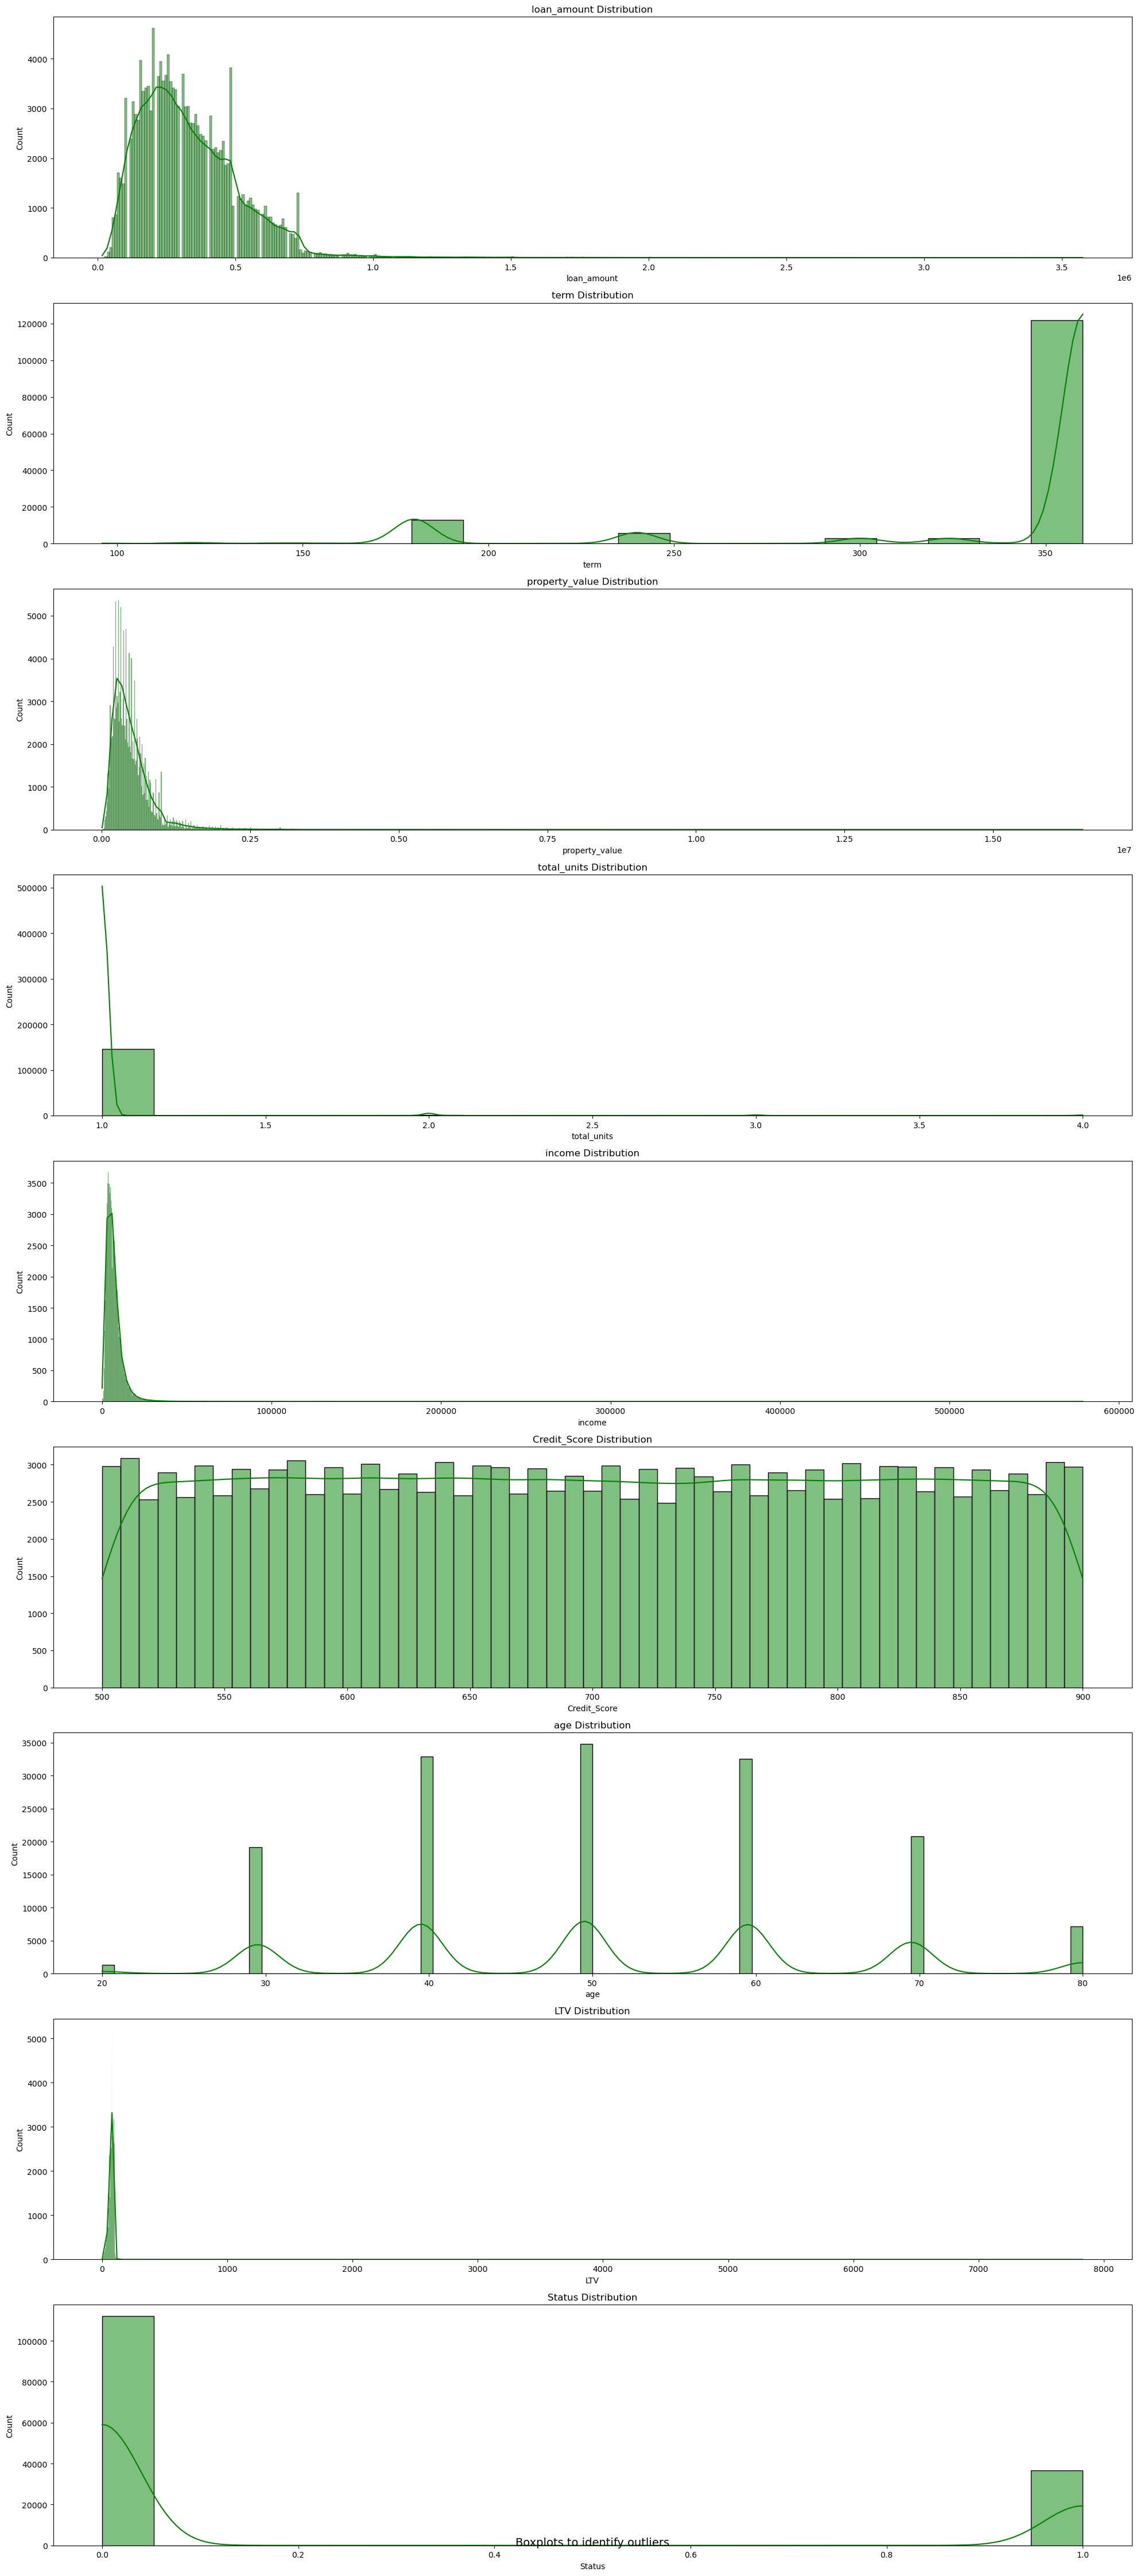

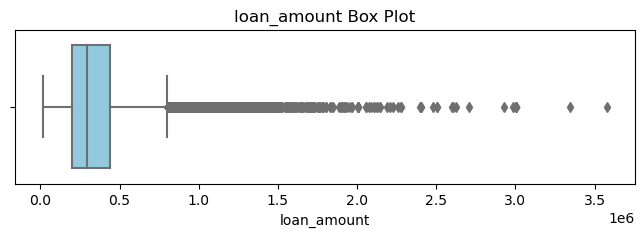

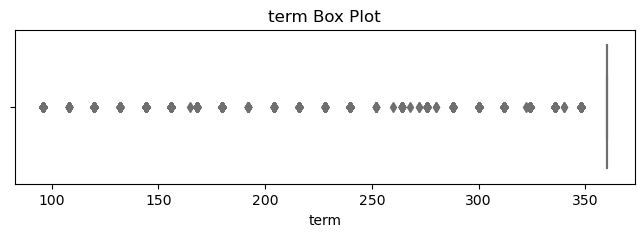

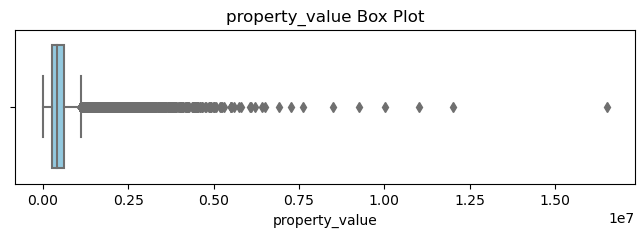

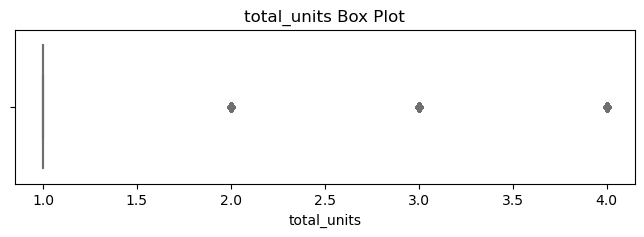

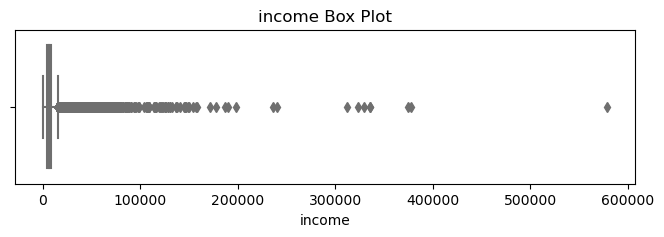

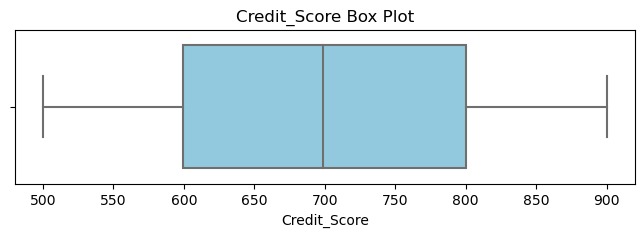

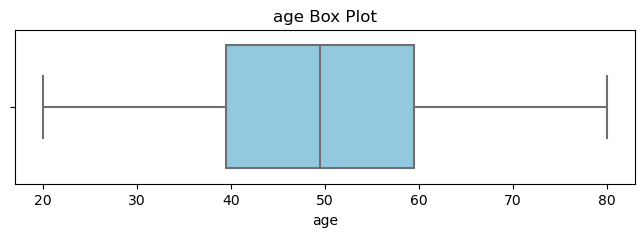

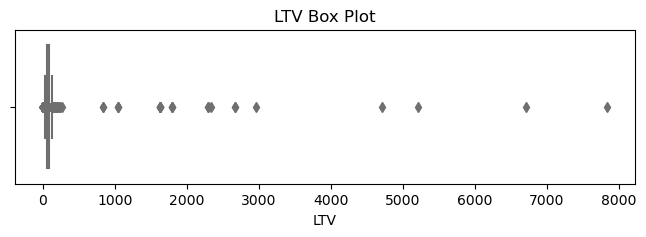

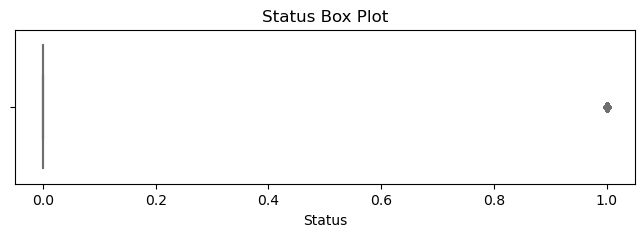

In [23]:
eda_univariate_analysis_numerical(df, numeric_features)

In [24]:
df['Status'].value_counts(normalize=True)

0.0    0.753555
1.0    0.246445
Name: Status, dtype: float64

<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 40px;">Univariate analysis Categorical Features</h3>

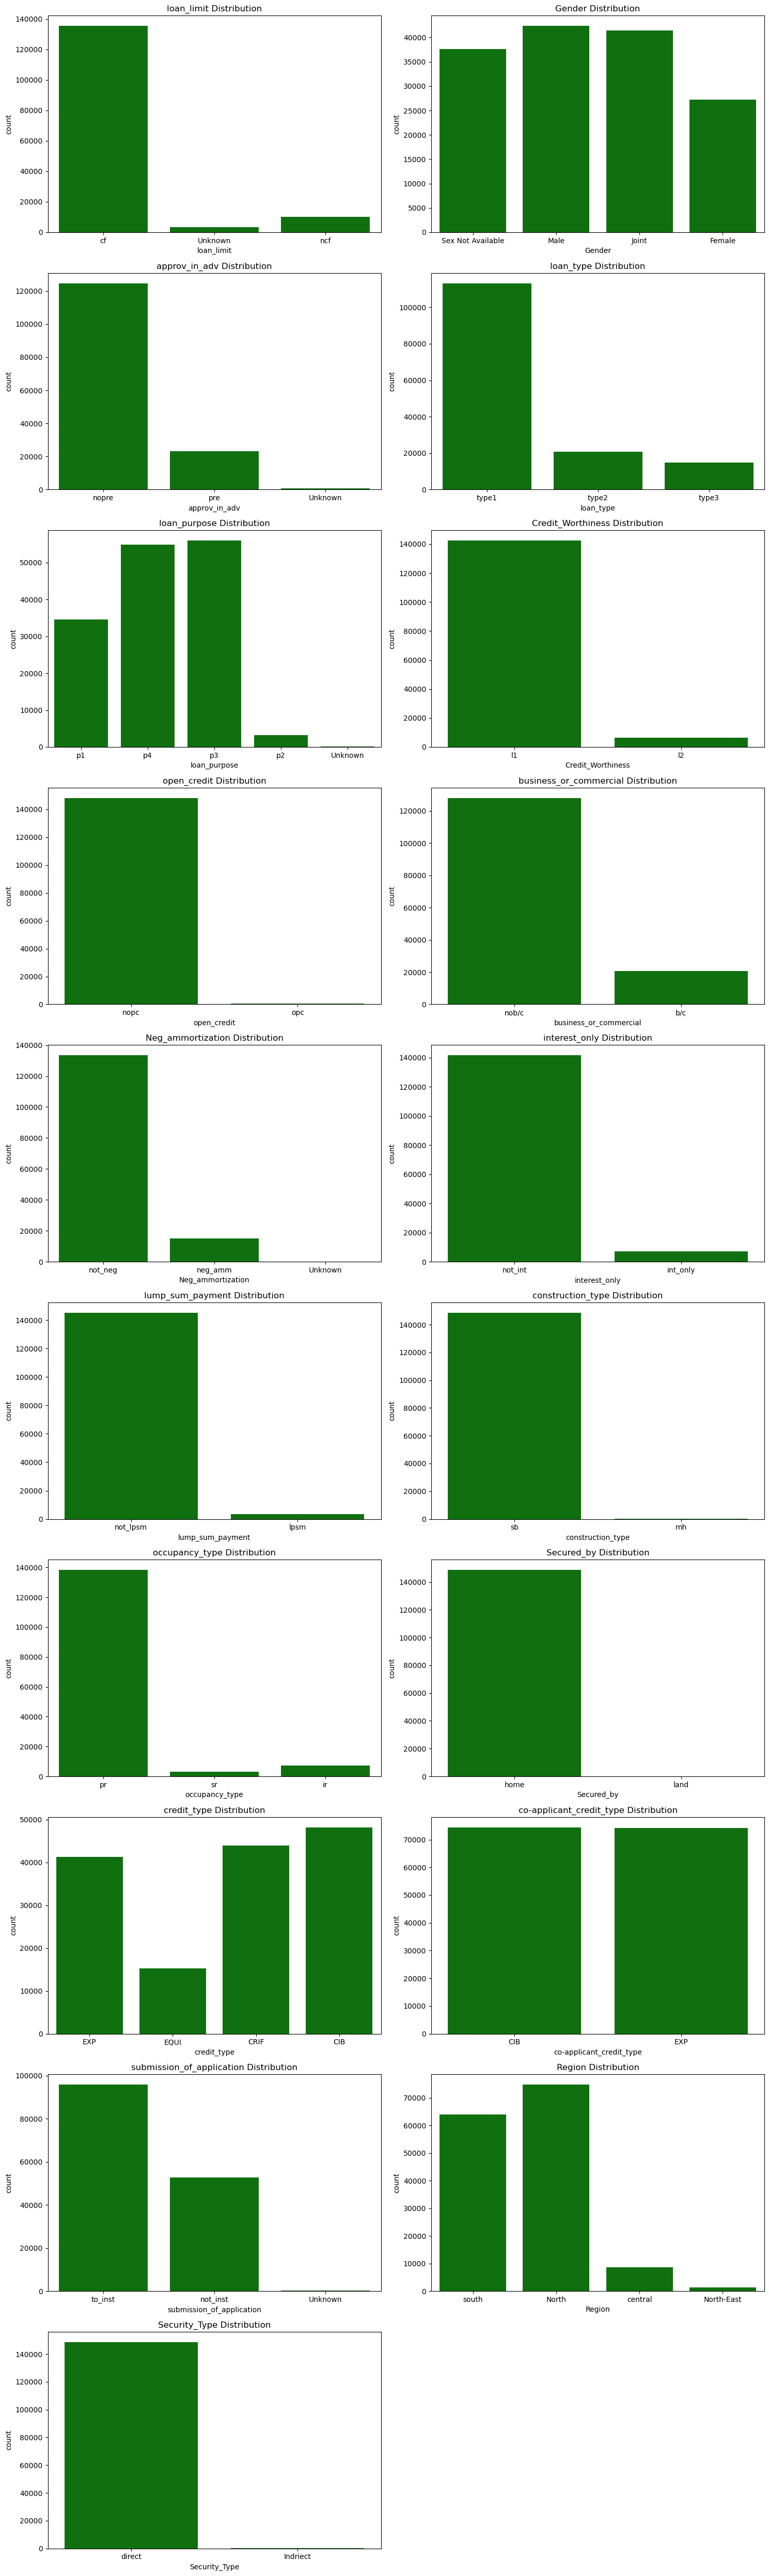

In [54]:
eda_univariate_analysis_categorical(df, categorical_features)

In [58]:
equi_counts = df[df['credit_type'] == 'EQUI']['Status'].value_counts()


<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 40px;">Bivariate analysis with Target Variable</h3>

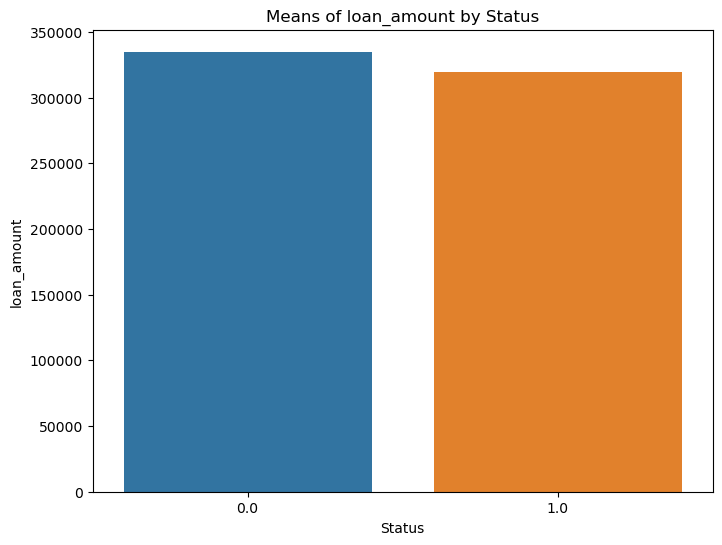

Means of loan_amount by Status:
   Status    loan_amount
0     0.0  334990.774875
1     1.0  319275.184912



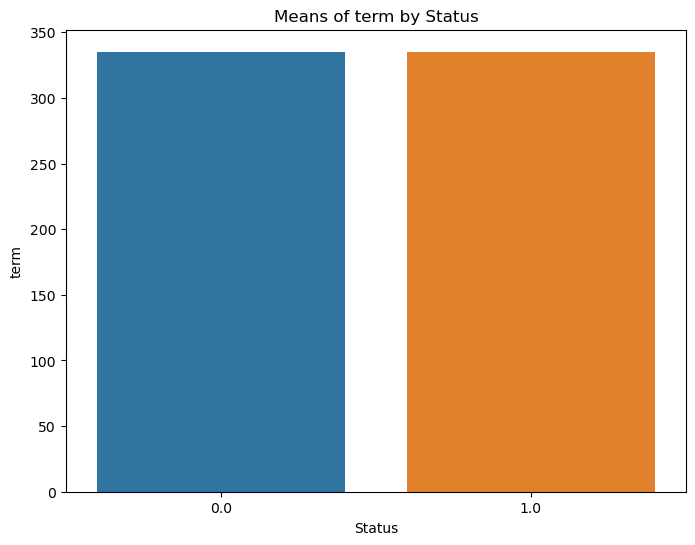

Means of term by Status:
   Status        term
0     0.0  335.140470
1     1.0  335.109064



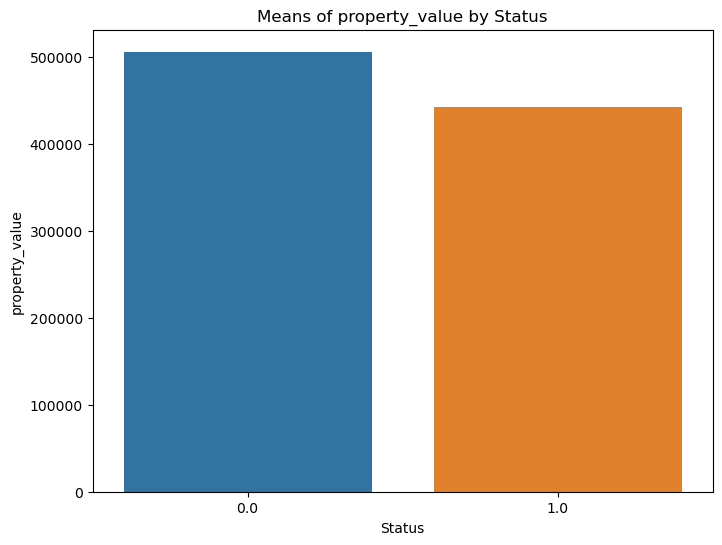

Means of property_value by Status:
   Status  property_value
0     0.0   505603.877498
1     1.0   441581.520602



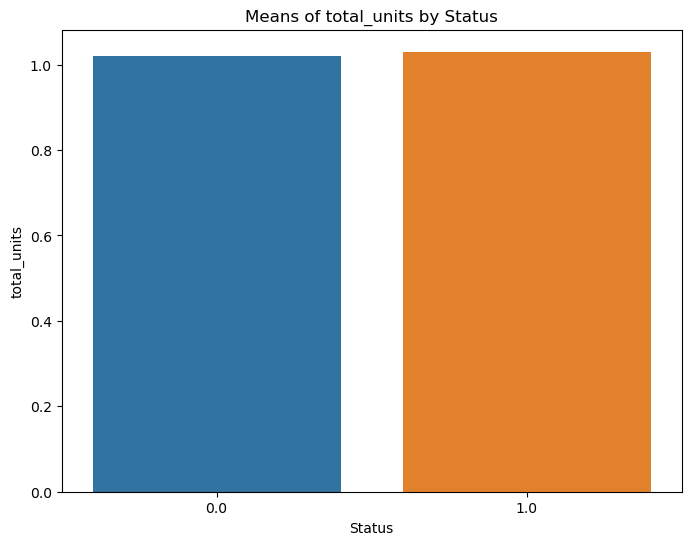

Means of total_units by Status:
   Status  total_units
0     0.0     1.018977
1     1.0     1.029941



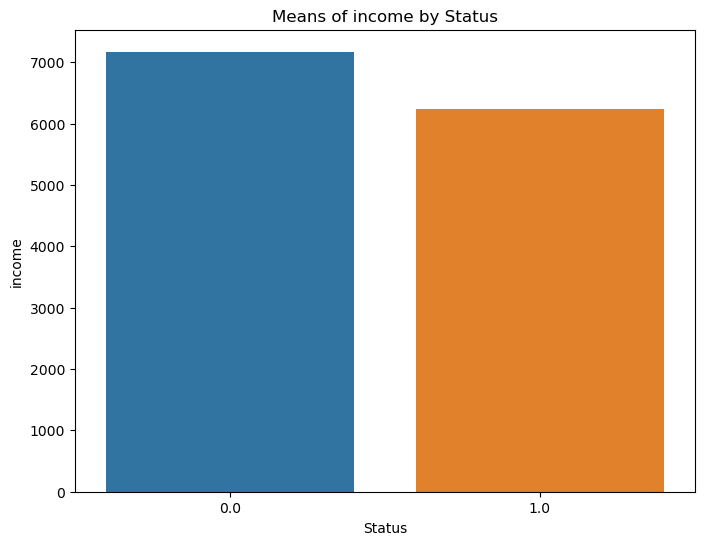

Means of income by Status:
   Status       income
0     0.0  7173.239550
1     1.0  6232.774912



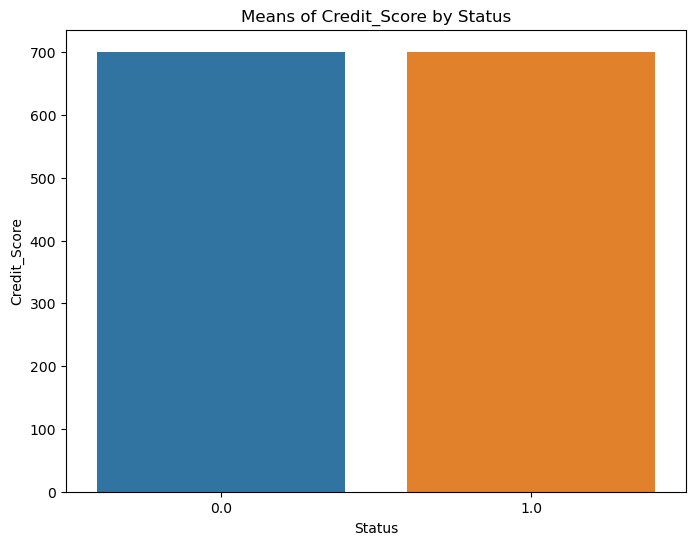

Means of Credit_Score by Status:
   Status  Credit_Score
0     0.0    699.523793
1     1.0    700.600344



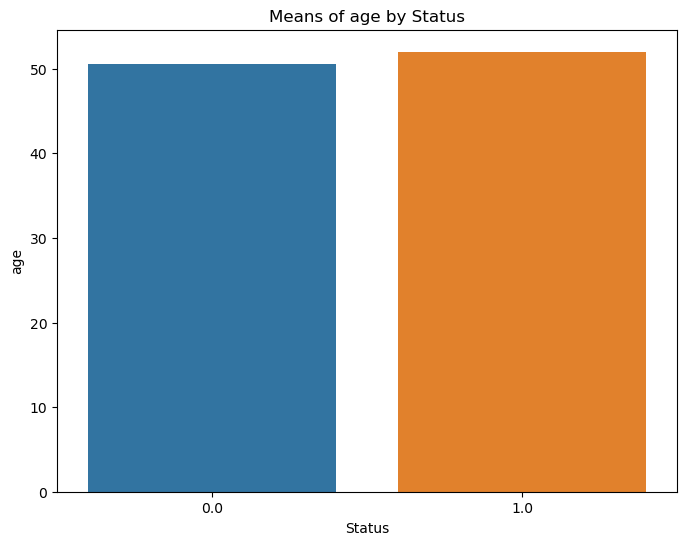

Means of age by Status:
   Status        age
0     0.0  50.542176
1     1.0  52.019155



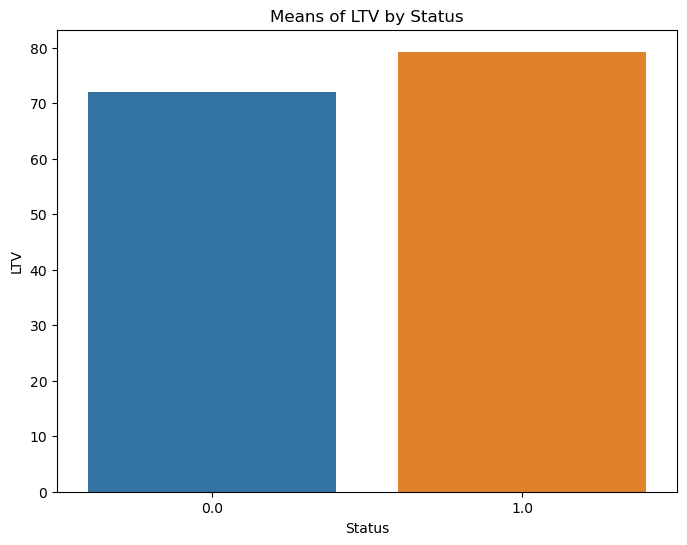

Means of LTV by Status:
   Status        LTV
0     0.0  72.064847
1     1.0  79.251026

  loan_limit    Status
0    Unknown  0.263457
1         cf  0.239708
2        ncf  0.332131


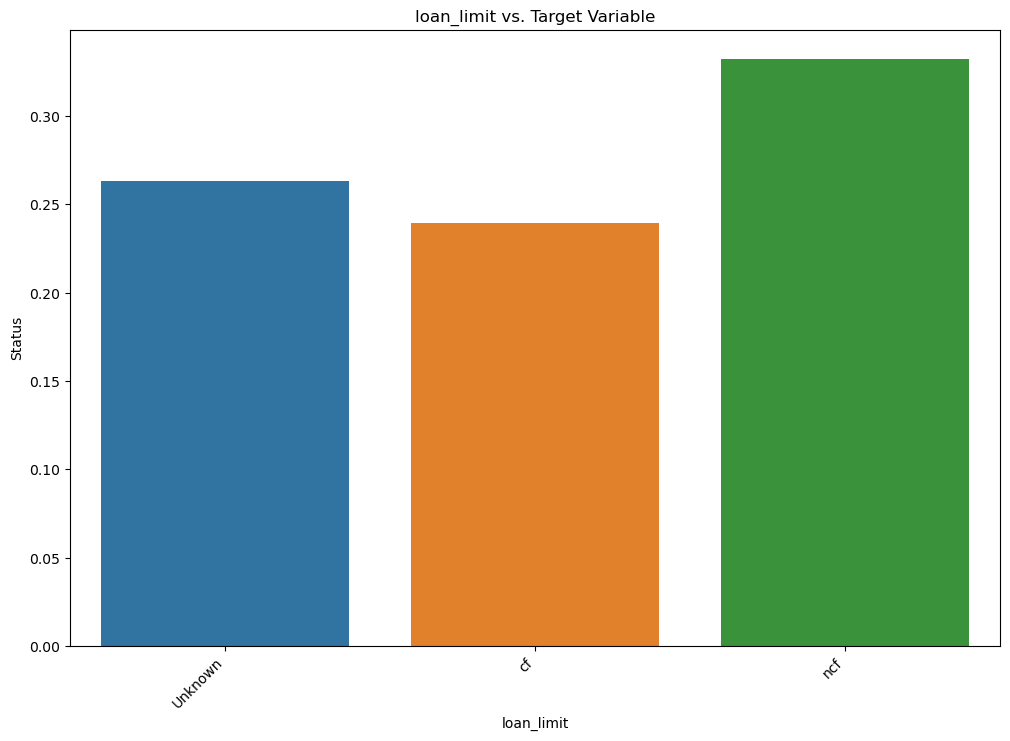

              Gender    Status
0             Female  0.251155
1              Joint  0.191623
2               Male  0.261914
3  Sex Not Available  0.285908


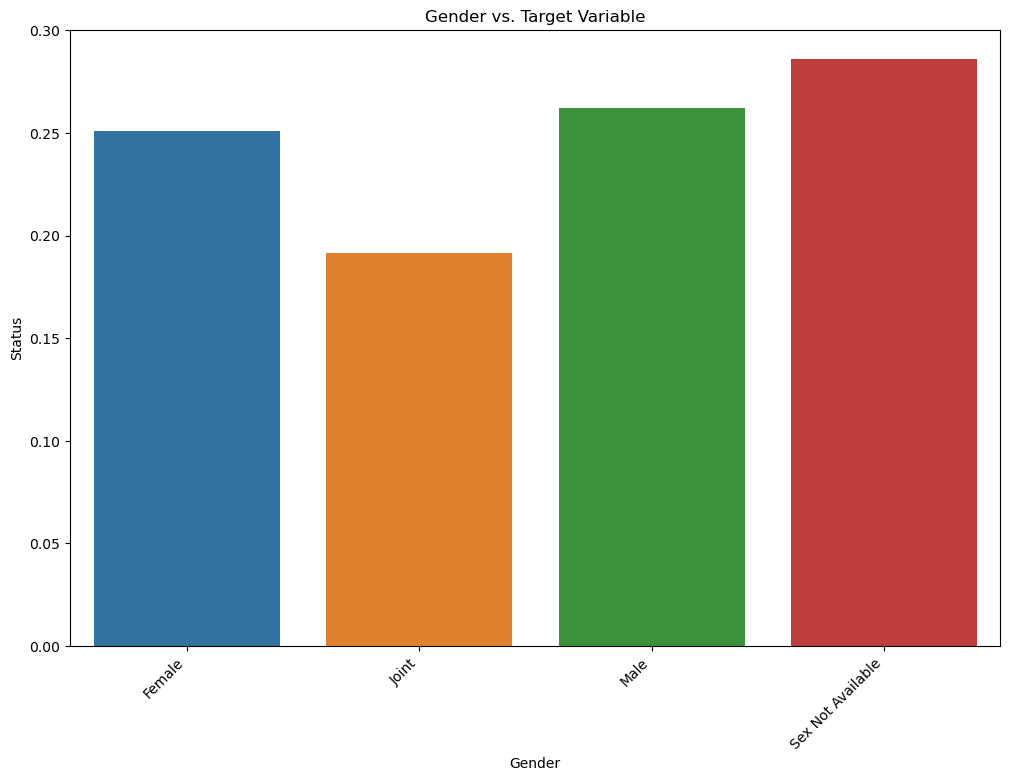

  approv_in_adv    Status
0       Unknown  0.265419
1         nopre  0.253272
2           pre  0.208937


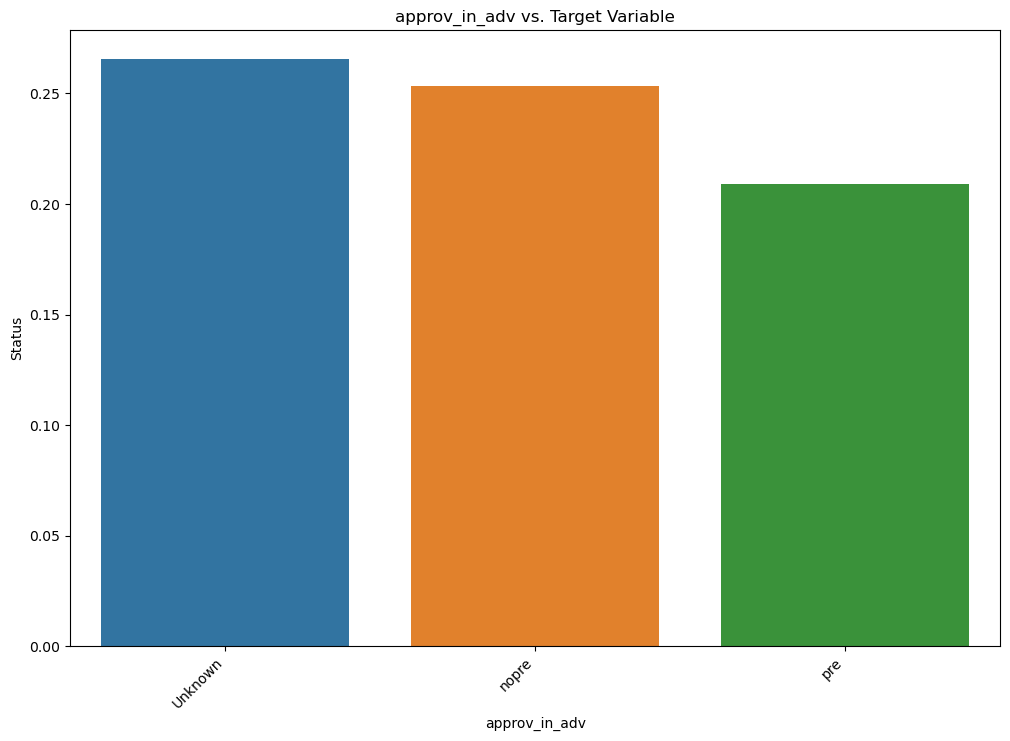

  loan_type    Status
0     type1  0.227749
1     type2  0.345439
2     type3  0.250560


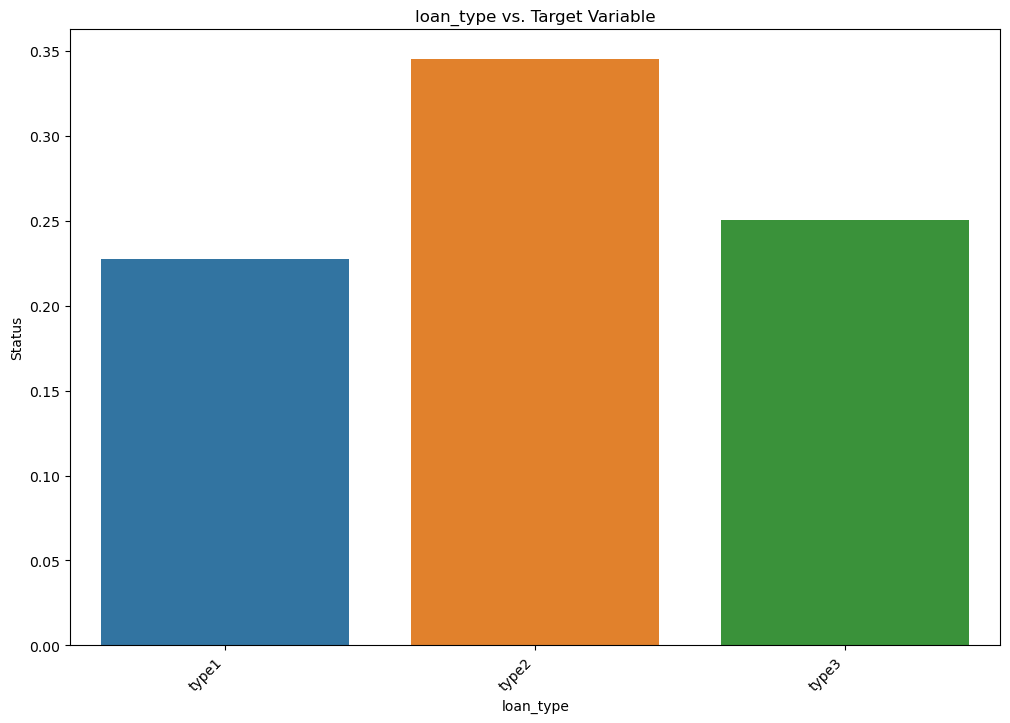

  loan_purpose    Status
0      Unknown  0.261194
1           p1  0.258768
2           p2  0.330788
3           p3  0.250223
4           p4  0.229749


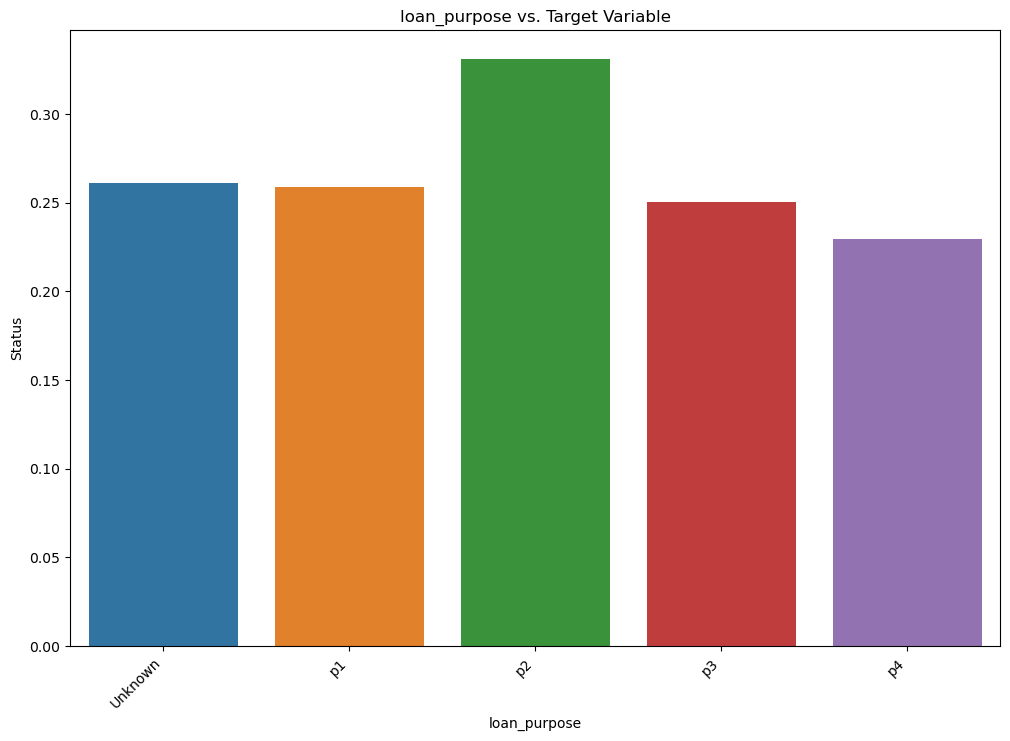

  Credit_Worthiness    Status
0                l1  0.243277
1                l2  0.317736


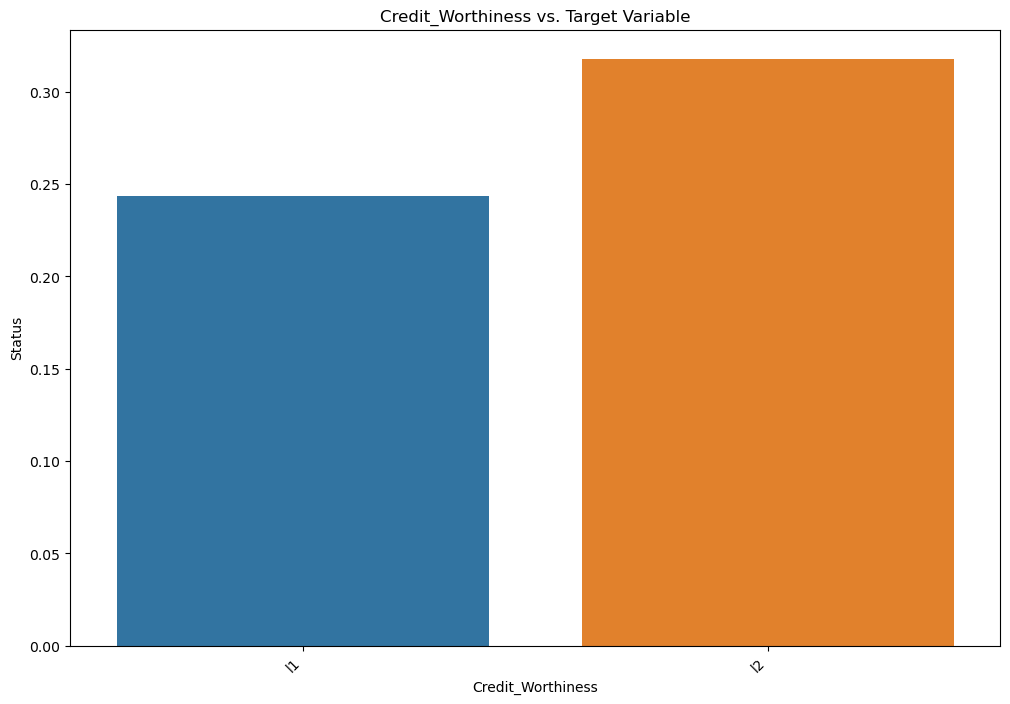

  open_credit    Status
0        nopc  0.246709
1         opc  0.176259


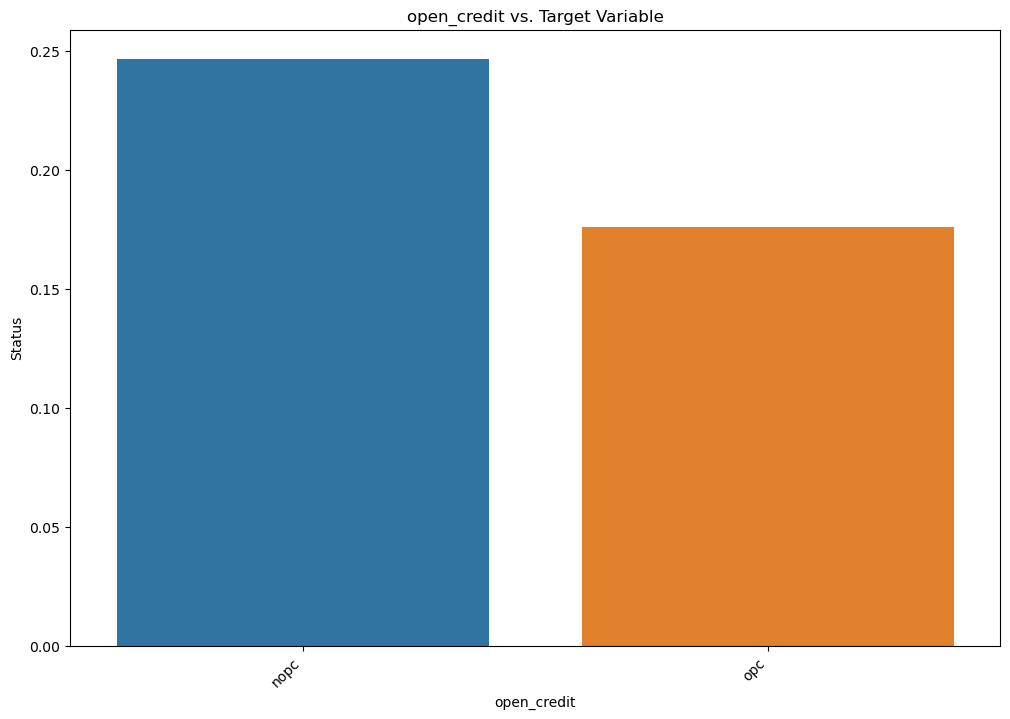

  business_or_commercial    Status
0                    b/c  0.345439
1                  nob/c  0.230377


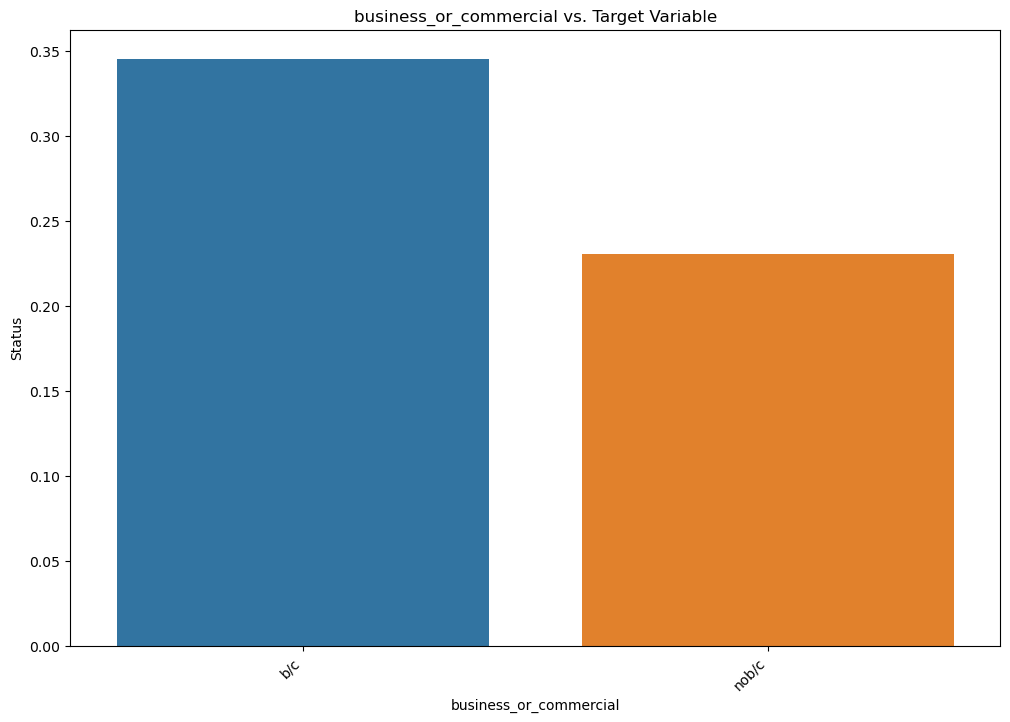

  Neg_ammortization    Status
0           Unknown  0.264463
1           neg_amm  0.445965
2           not_neg  0.223805


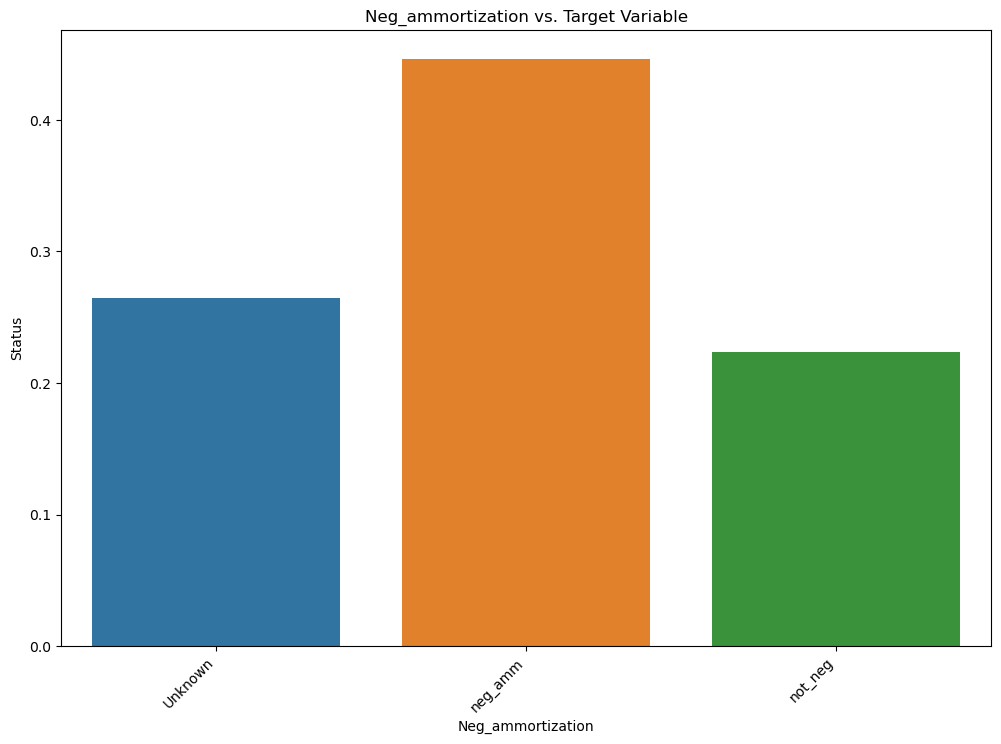

  interest_only    Status
0      int_only  0.273136
1       not_int  0.245105


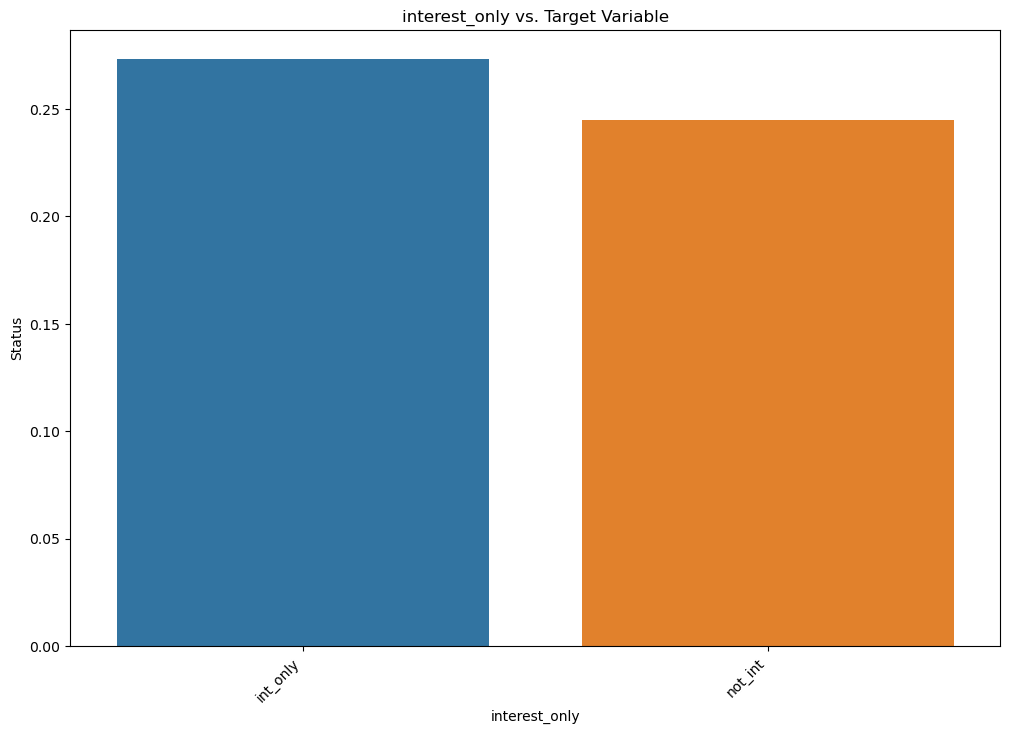

  lump_sum_payment    Status
0             lpsm  0.776596
1         not_lpsm  0.234097


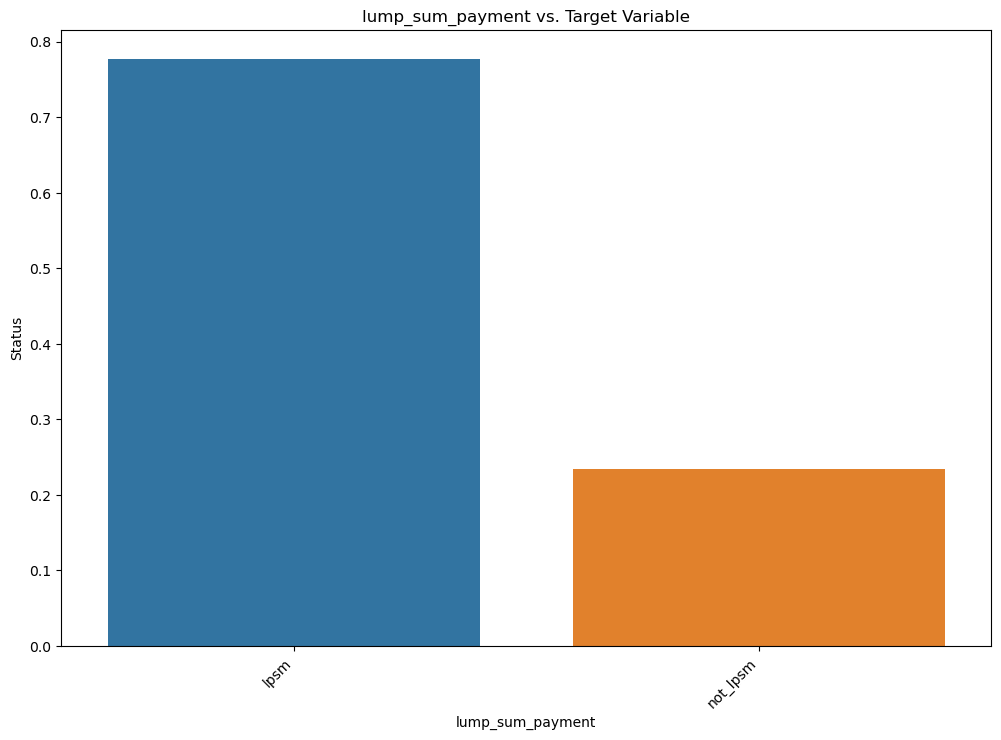

  construction_type    Status
0                mh  1.000000
1                sb  0.246278


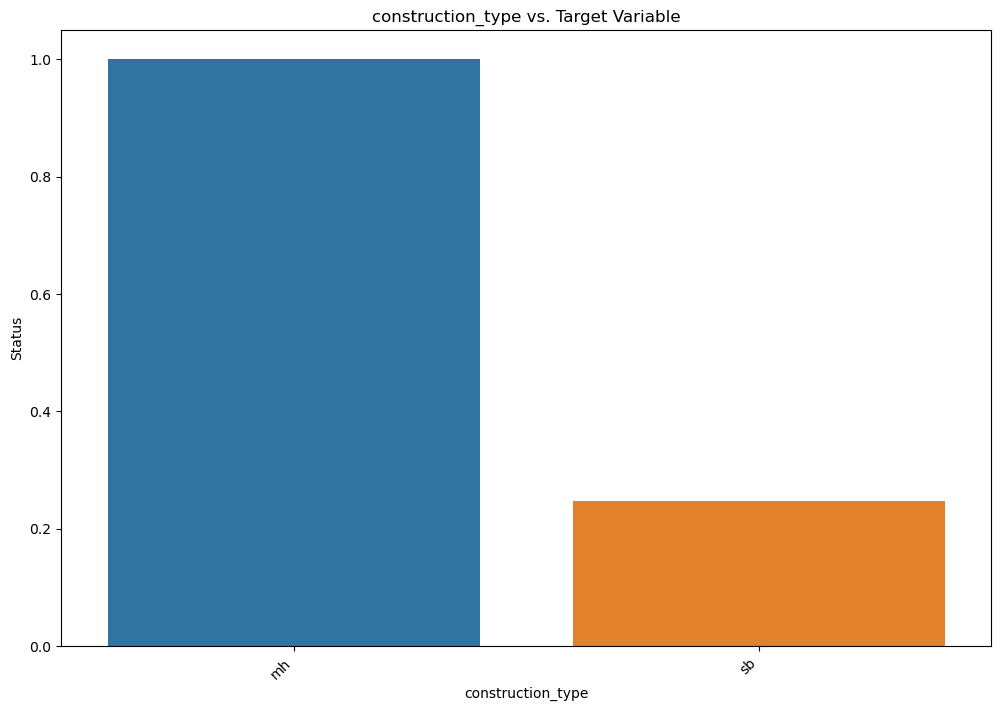

  occupancy_type    Status
0             ir  0.299864
1             pr  0.243045
2             sr  0.271333


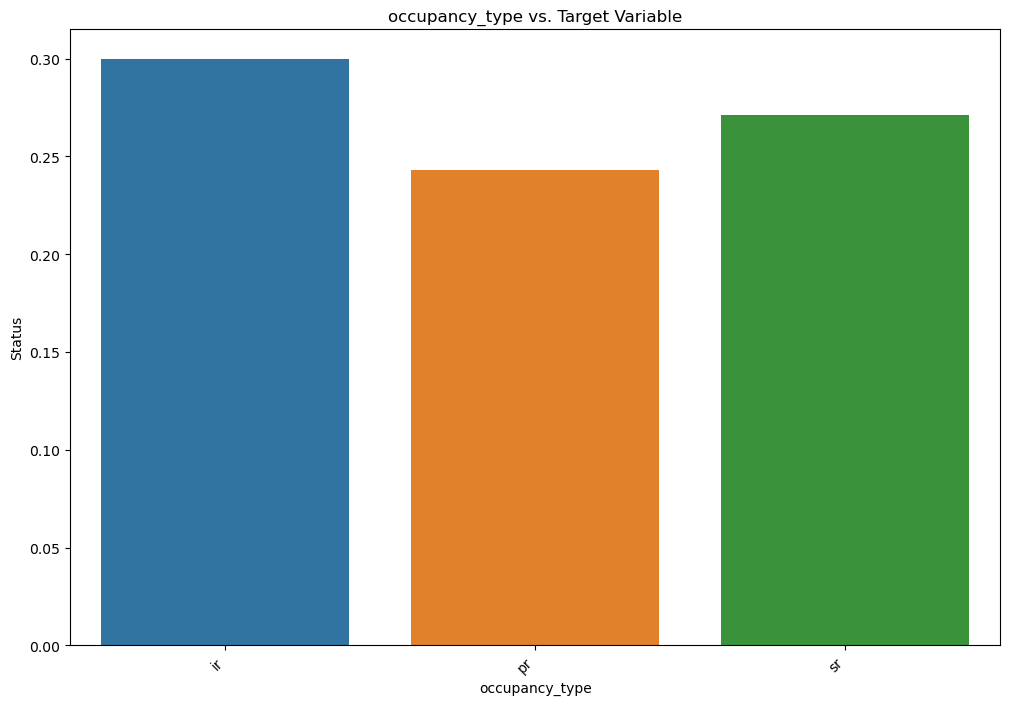

  Secured_by    Status
0       home  0.246278
1       land  1.000000


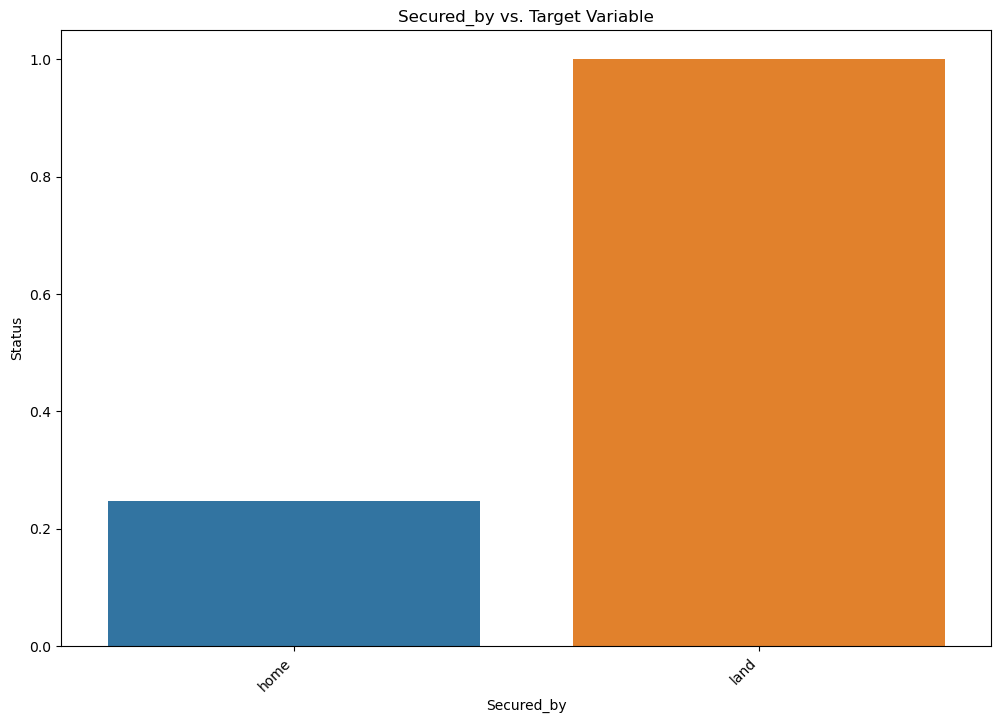

  credit_type    Status
0         CIB  0.158041
1        CRIF  0.162343
2        EQUI  0.999935
3         EXP  0.159854


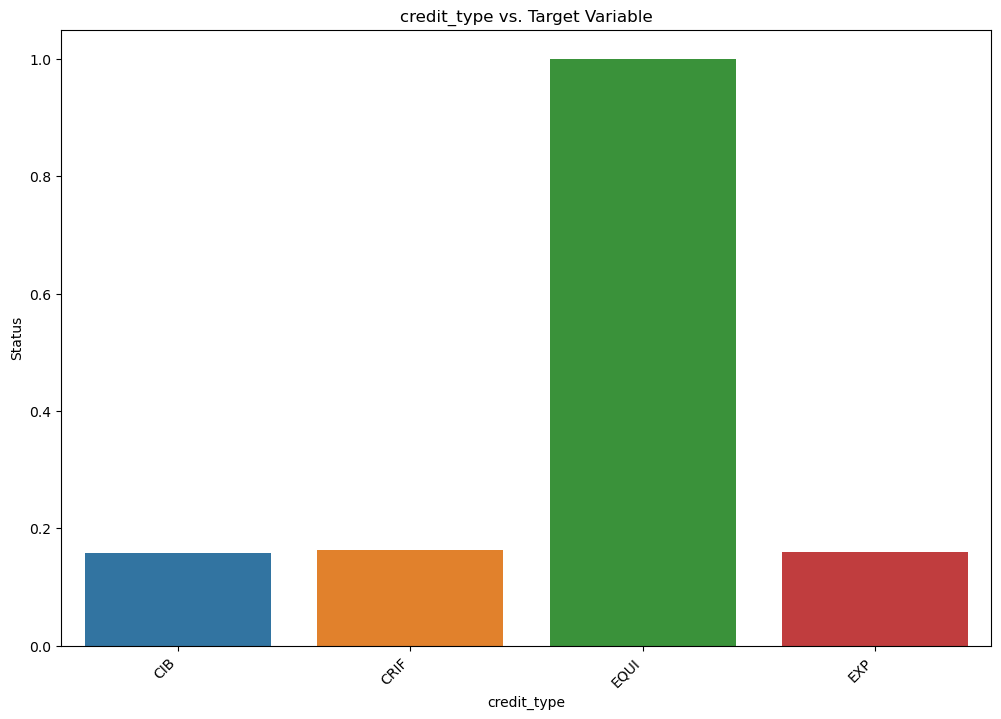

  co-applicant_credit_type    Status
0                      CIB  0.184334
1                      EXP  0.308651


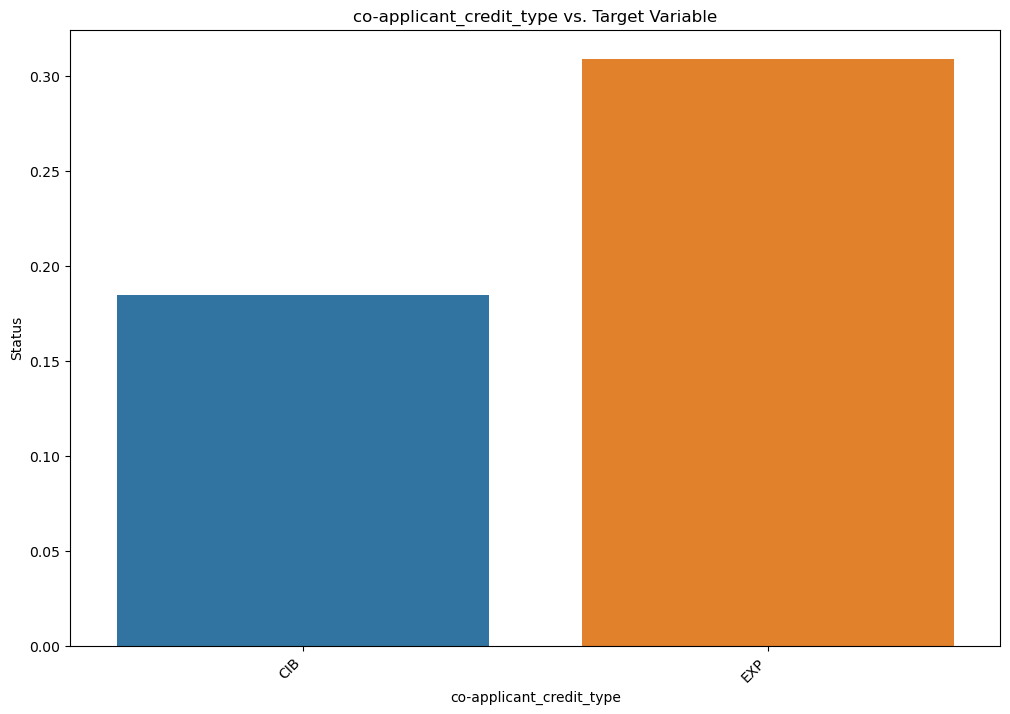

  submission_of_application    Status
0                   Unknown  1.000000
1                  not_inst  0.175213
2                   to_inst  0.284019


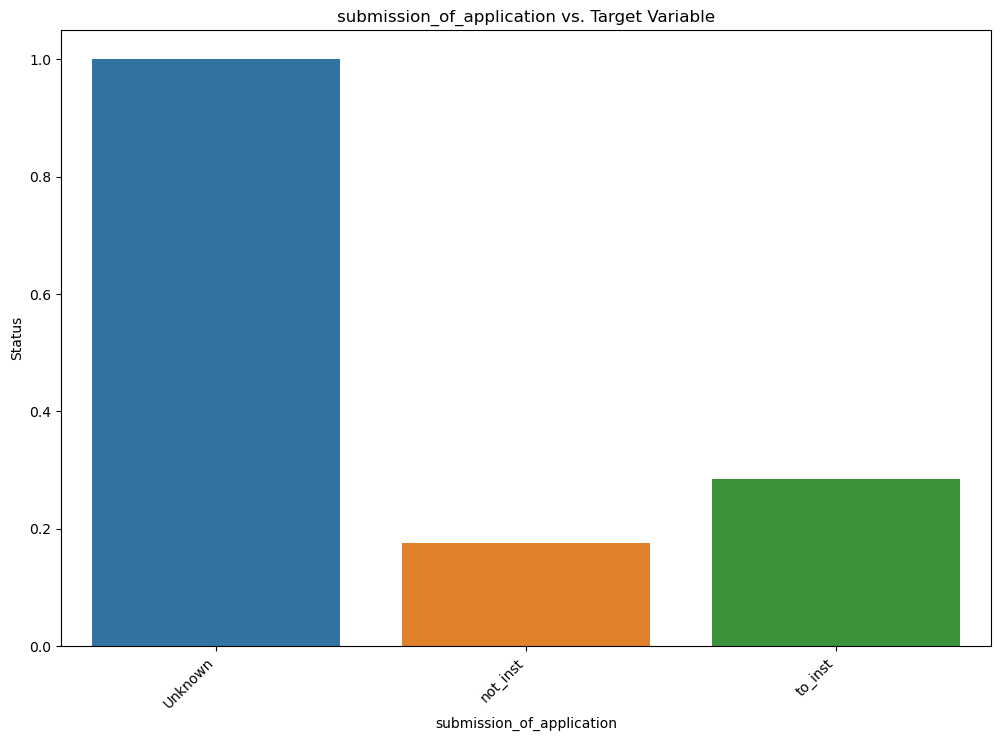

       Region    Status
0       North  0.225114
1  North-East  0.304453
2     central  0.275382
3       south  0.266293


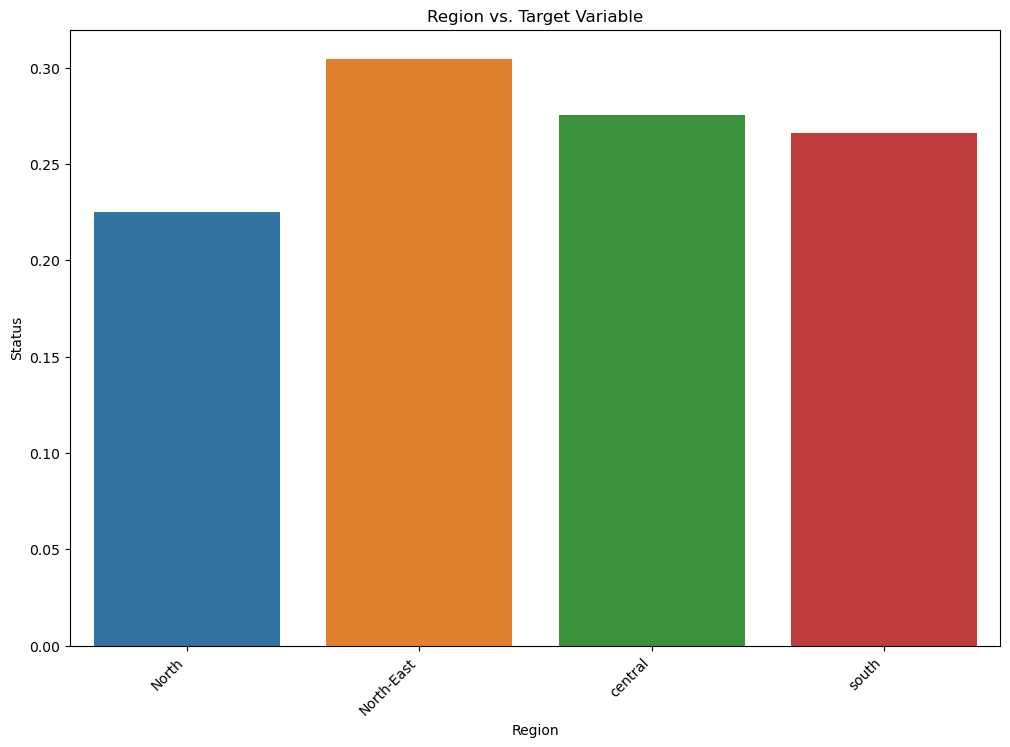

  Security_Type    Status
0      Indriect  1.000000
1        direct  0.246278


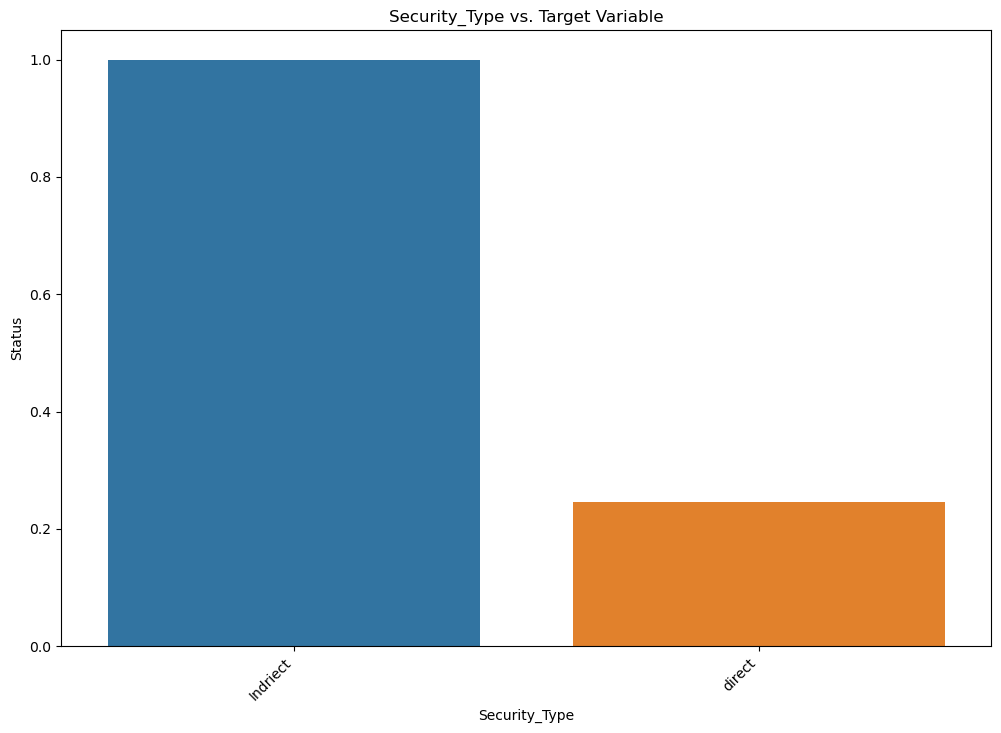

In [63]:
target_variable='Status'    
eda_bivariate_analysis(df, categorical_features,numeric_features,target_variable)

<h3 style="background-color:orange;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 40px;">Multivariate analysis</h3>

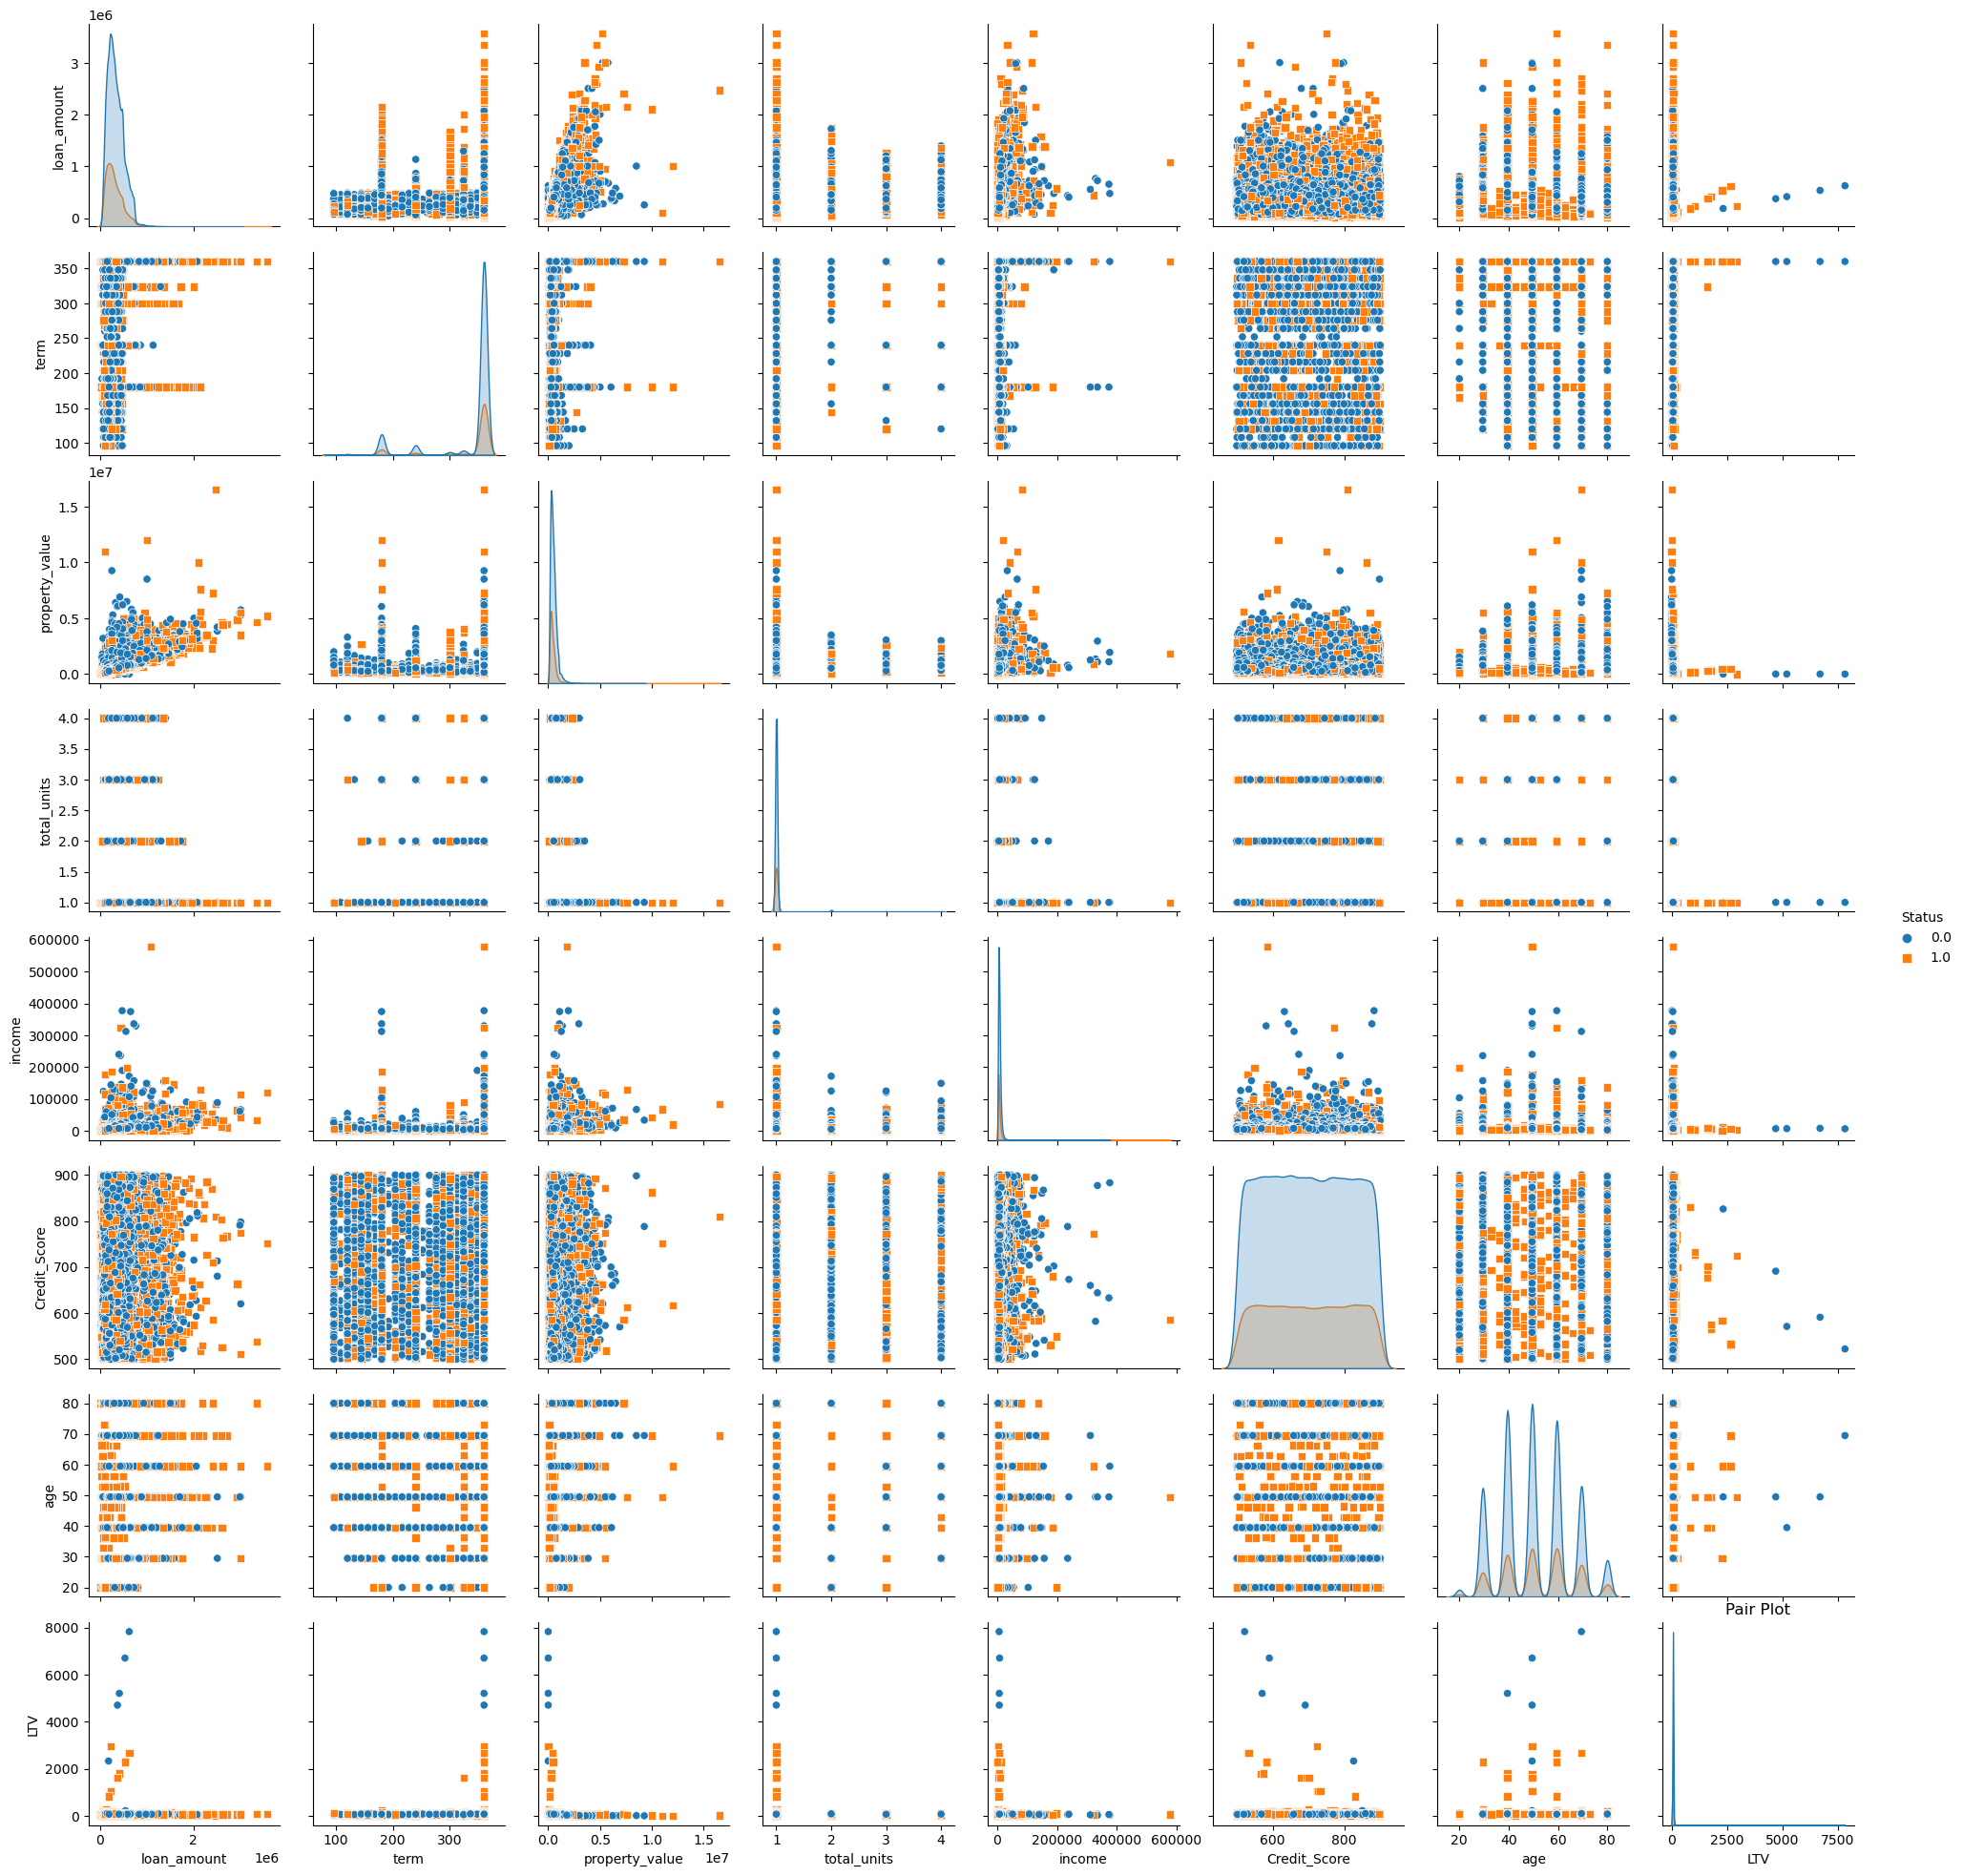

In [64]:
sns.pairplot(df, hue='Status', markers=["o", "s"])
plt.title('Pair Plot')
plt.show()

### Correlation heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

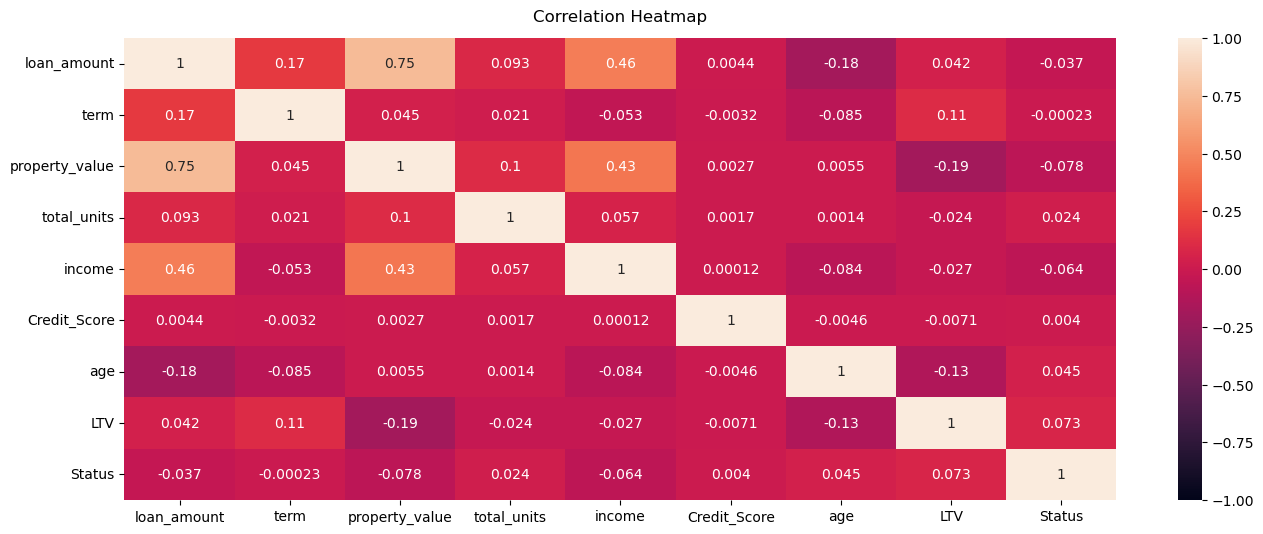

In [65]:
# Correlation
corr = df_num.corr()

# Correlation Heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

### Preprocessing data

In [25]:
X = df.drop('Status', axis=1)
y = df['Status']

In [26]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(sparse = False,drop = 'first'))
])

numerical_transformer = Pipeline([
    ('scaler', StandardScaler())])


preprocessor = ColumnTransformer(
        transformers=[
        ("cat", categorical_transformer, cat_features),
         ("num", numerical_transformer, num_features),
        ]        
        ,remainder="passthrough"
)

# Create a pipeline that includes the preprocessor
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

In [27]:
num_features

Index(['loan_amount', 'term', 'property_value', 'total_units', 'income',
       'Credit_Score', 'age', 'LTV'],
      dtype='object')

In [28]:
X_transform = pipeline.fit_transform(X)

/Users/kianathakkar/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [29]:
# Get the transformed column names
transformed_column_names = []

if len(cat_features) > 0:
    onehot_encoder = pipeline.named_steps['preprocessor'].transformers_[0][1].named_steps['onehot']
    feature_names = onehot_encoder.get_feature_names_out(input_features=cat_features)
    transformed_column_names.extend(feature_names)

# Append numerical column names
transformed_column_names.extend(num_features)

In [30]:
transformed_column_names

['loan_limit_cf',
 'loan_limit_ncf',
 'Gender_Joint',
 'Gender_Male',
 'Gender_Sex Not Available',
 'approv_in_adv_nopre',
 'approv_in_adv_pre',
 'loan_type_type2',
 'loan_type_type3',
 'loan_purpose_p1',
 'loan_purpose_p2',
 'loan_purpose_p3',
 'loan_purpose_p4',
 'Credit_Worthiness_l2',
 'open_credit_opc',
 'business_or_commercial_nob/c',
 'Neg_ammortization_neg_amm',
 'Neg_ammortization_not_neg',
 'interest_only_not_int',
 'lump_sum_payment_not_lpsm',
 'construction_type_sb',
 'occupancy_type_pr',
 'occupancy_type_sr',
 'Secured_by_land',
 'credit_type_CRIF',
 'credit_type_EQUI',
 'credit_type_EXP',
 'co-applicant_credit_type_EXP',
 'submission_of_application_not_inst',
 'submission_of_application_to_inst',
 'Region_North-East',
 'Region_central',
 'Region_south',
 'Security_Type_direct',
 'loan_amount',
 'term',
 'property_value',
 'total_units',
 'income',
 'Credit_Score',
 'age',
 'LTV']

In [31]:
#creating three sets - training, test and validation
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X_transform, y, test_size=0.1, random_state=42)

# Splitting temporary set into validation and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.1, random_state=42)

In [32]:
# Initialize the random undersampler
undersampler = RandomUnderSampler(sampling_strategy=0.5,random_state=42)

# Apply the undersampler to the training data
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# Count the number of samples in each class after undersampling
resampled_class_counts = pd.Series(y_train_resampled).value_counts()
print("Class distribution after undersampling:\n", resampled_class_counts)

Class distribution after undersampling:
 0.0    59392
1.0    29696
Name: Status, dtype: int64


In [33]:
def evaluate_model(true, predicted):
     # Calculate accuracy
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    # Calculate ROC AUC
    roc_auc = roc_auc_score(true, predicted)
    
    return accuracy, precision, recall, f1,roc_auc

In [34]:
#Trying out different models for the best performance
models = {
    "Logistic Regression": LogisticRegression(),
    "XGBClassifier": XGBClassifier(verbose=0),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
}

In [36]:
# Defining Hyper Parameters for fine tuning and selecting the best model

params = {
    "Logistic Regression": {
        "C": [0.001, 0.01, 0.1, 1, 10],
        "penalty": ["l1", "l2"]
    },
    "XGBClassifier": {
        "learning_rate": [0.01, 0.1, 0.2],
        "n_estimators": [100, 200,300],
        "max_depth": [3, 4, 5,10],
        "min_child_weight": [1, 2, 3],
        "subsample": [0.8, 0.9, 1.0],
        "colsample_bytree": [0.8, 0.9, 1.0]
    },
    "CatBoost Classifier": {
        "iterations": [100, 200,300],
        "learning_rate": [0.01, 0.1, 0.2],
        "depth": [3, 4, 5,10],
        "l2_leaf_reg": [3, 5, 7, 9]
    },
    "Decision Tree": {
        "max_depth": [2, 3, 5,7],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [2, 4],
        "criterion": ["gini", "entropy"]
    },
    "Random Forest Classifier": {
        "n_estimators": [100, 200,300],
        "max_depth": [2,3,5,7],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [2, 4],
        "criterion": ["gini", "entropy"]
    }
    # ,
    # "Light GBM Classifier": {
    #     "learning_rate": [0.01, 0.1, 0.2],
    #     "n_estimators": [100, 200],
    #     "max_depth": [3, 4, 5,10],
    #     "num_leaves": [31, 63, 127]
    # }
}

### Running hyper param tuning for different models

In [37]:
#Defining data_list to get the performance benchmark for all models

data_list = []

from sklearn.metrics import make_scorer, recall_score

# Define a custom scorer for recall
scorer = make_scorer(recall_score, average='binary') 

#Hyper parameter tuning for each model in the original list across different params
for i in range(len(list(models))):
    model = list(models.values())[i]
    para=params[list(models.keys())[i]]
    
    gs = RandomizedSearchCV(model, param_distributions=para,n_iter=10, scoring='accuracy', n_jobs=-1, cv=5, verbose=0, random_state=42)
  
    gs.fit(X_train,y_train)
    
    best_params = gs.best_params_
    best_estimator = gs.best_estimator_

    best_model = model.set_params(**best_params)
    
    best_model.fit(X_train_resampled,y_train_resampled)

    # Make predictions
    y_train_pred = best_model.predict(X_train_resampled)
    y_val_pred = best_model.predict(X_val)
    
    # Evaluate Train and Test dataset
    model_train_accuracy,model_train_precision,model_train_recall,model_train_f1,train_roc_auc = evaluate_model(y_train_resampled, y_train_pred)

    model_test_accuracy, model_test_precision, model_test_recall,model_test_f1,test_roc_auc = evaluate_model(y_val, y_val_pred)
        
    print(list(models.keys())[i])
    
    # Print the best parameters and best score
    print("Best Parameters:", best_params)
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- Precision: {:.4f}".format(model_train_precision))
    print("- Recall: {:.4f}".format(model_train_recall))
    print("- F1 score: {:.4f}".format(model_train_f1))
    print("- ROC AUC: {:.4f}".format(train_roc_auc))

    print('----------------------------------')
    
    #REporting the performance for validation set
    print('Model performance for Validation set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- Precision: {:.4f}".format(model_test_precision))
    print("- Recall: {:.4f}".format(model_test_recall))
    print("- F1 score: {:.4f}".format(model_test_f1))
    print("- ROC AUC: {:.4f}".format(test_roc_auc))
      
    data_list.append({'Model': list(models.keys())[i], 'BestAccuracy': model_test_accuracy,'Recall':model_test_recall,'Precision':model_test_precision,'ROC_AUC':test_roc_auc, 'ModelParams': best_params})
    
    print('='*35)
    print('\n')

/Users/kianathakkar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kianathakkar/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Logistic Regression
Best Parameters: {'penalty': 'l2', 'C': 10}
Model performance for Training set
- Accuracy: 0.8240
- Precision: 0.9191
- Recall: 0.5177
- F1 score: 0.6623
- ROC AUC: 0.7474
----------------------------------
Model performance for Validation set
- Accuracy: 0.8574
- Precision: 0.8848
- Recall: 0.5092
- F1 score: 0.6464
- ROC AUC: 0.7432


[16:13:57] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[16:13:57] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[16:13:57] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

[16:13:57] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/cr

In [38]:
data = pd.DataFrame(data_list)

# Sort the DataFrame by the 'Best Scire' in descending order
data = data.sort_values(by='Recall', ascending=False)

# Reset the index to have continuous index values
data.reset_index(drop=True, inplace=True)

# Print the resulting sorted DataFrame
print(data)

                      Model  BestAccuracy    Recall  Precision   ROC_AUC  \
0             XGBClassifier      0.879830  0.616642   0.877441  0.793506   
1             Decision Tree      0.869143  0.525839   0.934129  0.756542   
2       Logistic Regression      0.857410  0.509197   0.884830  0.743198   
3  Random Forest Classifier      0.868246  0.508321   0.956593  0.750193   

                                         ModelParams  
0  {'subsample': 0.8, 'n_estimators': 100, 'min_c...  
1  {'min_samples_split': 5, 'min_samples_leaf': 2...  
2                         {'penalty': 'l2', 'C': 10}  
3  {'n_estimators': 300, 'min_samples_split': 2, ...  


In [39]:
model_name = 'XGBClassifier'

final_model = models[model_name]

final_params = data[data['Model'] == model_name]['ModelParams'].values[0]

xgb = final_model.set_params(**final_params)

xgb_trained = xgb.fit(X_train_resampled, y_train_resampled)


[16:23:21] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "verbose" } are not used.



In [40]:
y_scores = xgb_trained.predict_proba(X_test)[:, 1]

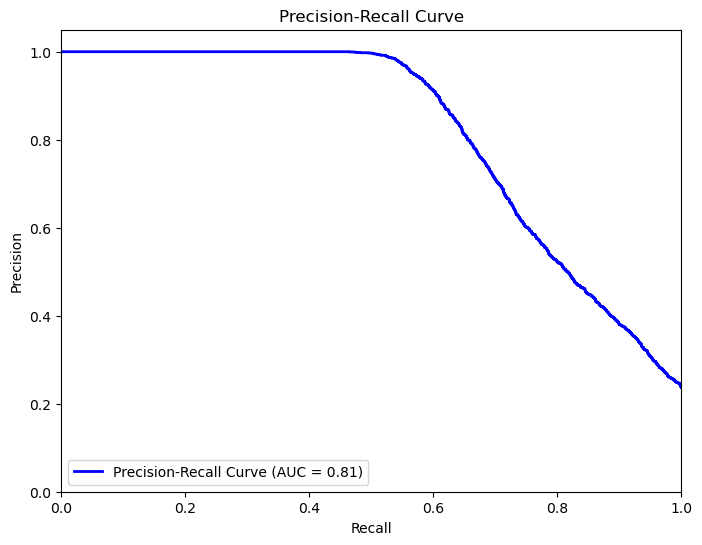

Optimal Threshold for Maximum F1-Score: 0.44650128


In [41]:
# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate the area under the precision-recall curve (AUC-PR)
auc_pr = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall Curve (AUC = %0.2f)' % auc_pr)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower left")
plt.title('Precision-Recall Curve')
plt.show()

# Find the threshold that balances precision and recall
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold_pr = thresholds[np.argmax(f1_scores)]

print("Optimal Threshold for Maximum F1-Score:", optimal_threshold_pr)

In [42]:
# Initialize variables to store the optimal threshold
optimal_threshold = None

# Set the desired precision and recall thresholds
desired_precision = 0.5
desired_recall = 0.8

# Iterate through thresholds and find the first threshold that meets the criteria
for threshold, prec, rec in zip(thresholds, precision, recall):
    if prec >= desired_precision and rec >= desired_recall:
        optimal_threshold = threshold
        break

if optimal_threshold is not None:
    print("Optimal Threshold for Precision > 0.5 and Recall > 0.8:", optimal_threshold)
else:
    print("No threshold found that meet the creteria")

Optimal Threshold for Precision > 0.5 and Recall > 0.8: 0.20770799


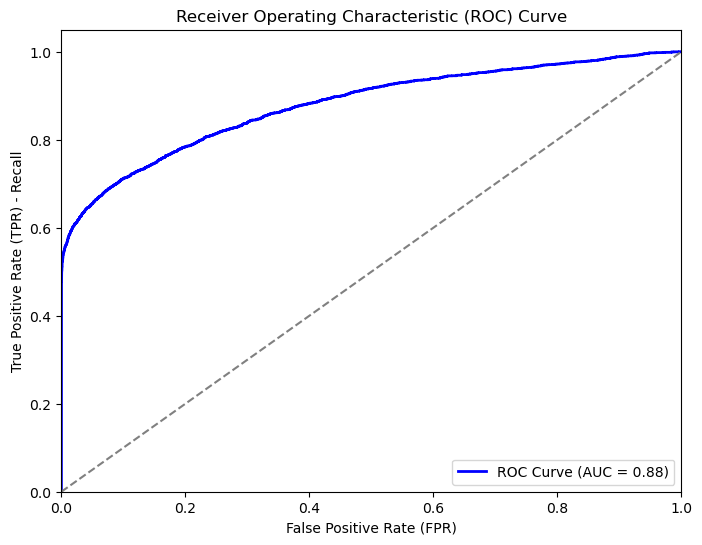

In [43]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the area under the ROC curve (AUC-ROC)
auc_roc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC Curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) - Recall')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc="lower right")
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [44]:
# Calculate Youden's J Statistic for each threshold
youden_j = tpr - fpr

# Find the index of the threshold that maximizes Youden's J
optimal_threshold_index = np.argmax(youden_j)

# Get the optimal threshold value
optimal_threshold = thresholds[optimal_threshold_index]

print(optimal_threshold)

0.35262254


In [49]:
optimal_threshold = 0.24

In [50]:
y_test_pred = (y_scores >= optimal_threshold).astype(int)

y_val_scores =  xgb_trained.predict_proba(X_val)[:, 1]

y_val_pred = (y_val_scores >= optimal_threshold).astype(int)

test_accuracy,test_precision,test_recall,test_f1,test_roc_auc = evaluate_model(y_test, y_test_pred)

val_accuracy , val_precision,val_recall,val_f1,val_roc_auc = evaluate_model(y_val, y_val_pred)

print(" Precision of the model on test set is %.2f" %test_precision)

print(" Recall of the model on test set is %.2f" %test_recall)

print(" ROC AUC of the model on test set is %.2f" %test_roc_auc)

print(" Precision of the model on validation set is %.2f" %val_precision)

print(" Recall of the model on validation set is %.2f" %val_recall)

print(" ROC AUC of the model on validation set is %.2f" %val_roc_auc)

 Precision of the model on test set is 0.55
 Recall of the model on test set is 0.78
 ROC AUC of the model on test set is 0.79
 Precision of the model on validation set is 0.57
 Recall of the model on validation set is 0.78
 ROC AUC of the model on validation set is 0.79


In [51]:
feature_importance = xgb.feature_importances_

# Create a dictionary of feature names and feature importance scores
feature_importance_mapping = {}
for i, col_name in enumerate(transformed_column_names):
    feature_importance_mapping[col_name] = feature_importance[i]
    
# Sort the feature importance dictionary by score in descending order
sorted_feature_importance = sorted(feature_importance_mapping.items(), key=lambda x: x[1], reverse=True)

# Create a DataFrame from the sorted feature importances
df_feature_imp = pd.DataFrame(sorted_feature_importance, columns=["Feature", "Importance"])

In [52]:
pd.set_option('display.max_rows', None)

df_feature_imp

,Feature,Importance
0,credit_type_EQUI,0.766414
1,lump_sum_payment_not_lpsm,0.051401
2,Neg_ammortization_neg_amm,0.025588
3,Credit_Worthiness_l2,0.014407
4,submission_of_application_not_inst,0.012367
5,loan_limit_cf,0.010420
6,Neg_ammortization_not_neg,0.008594
7,loan_limit_ncf,0.007172
8,loan_type_type3,0.007011
9,approv_in_adv_pre,0.006476


<Axes: ylabel='Feature'>

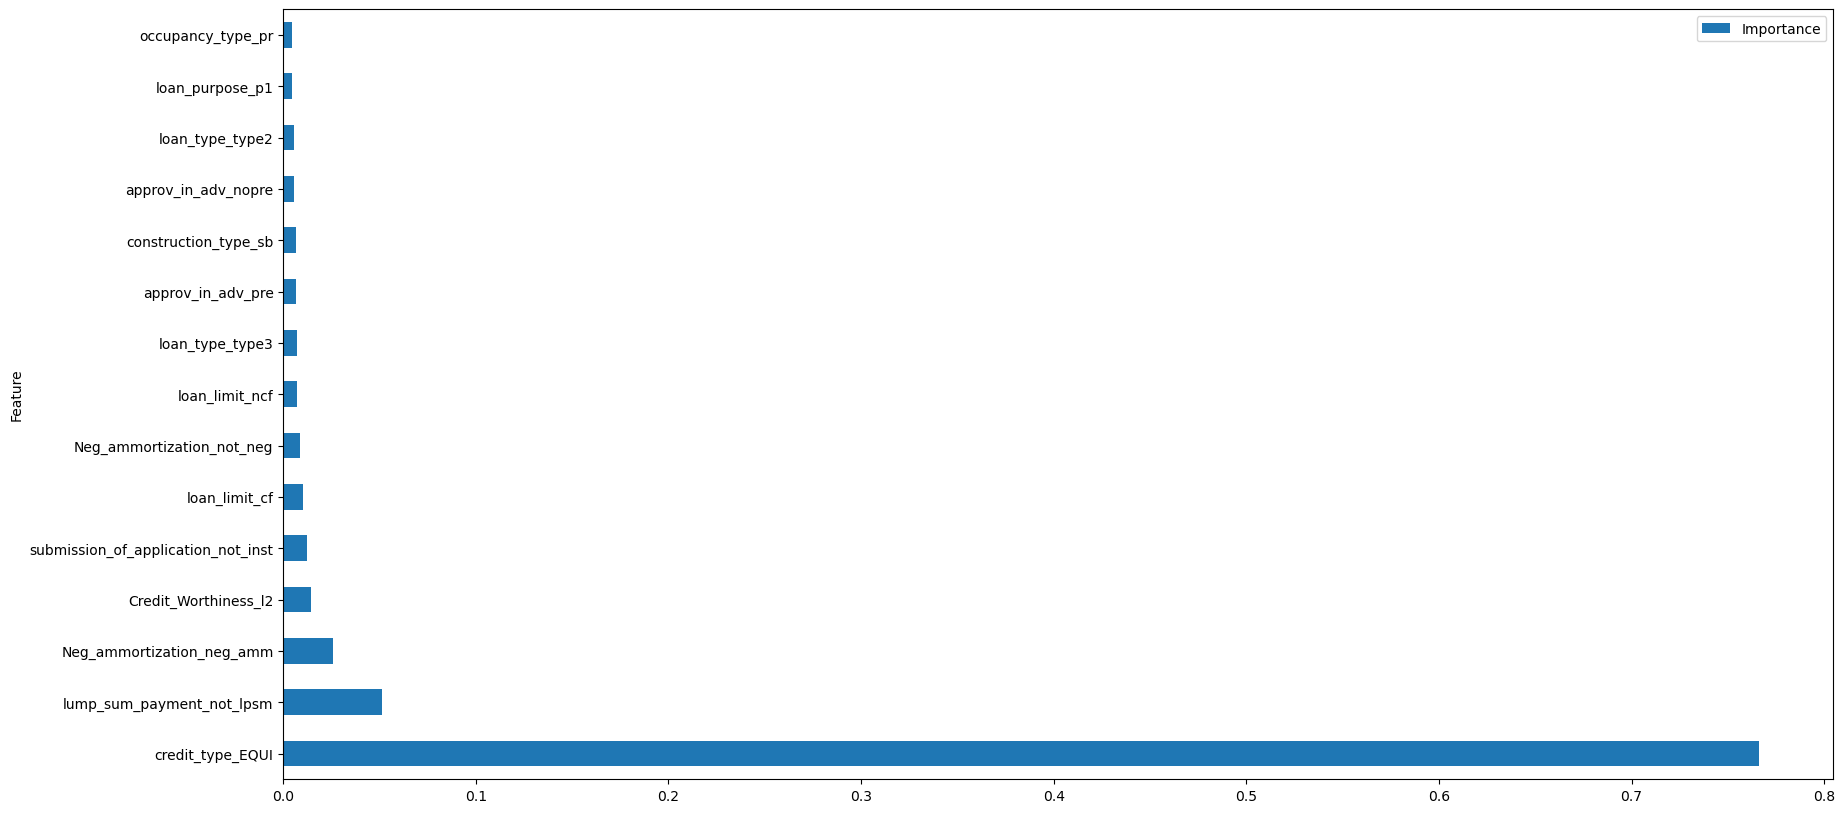

In [53]:
df_feature_imp.nlargest(15, columns="Importance").reset_index(drop=True).plot(kind='barh', y='Importance', x='Feature', figsize=(20, 10))